**Custom Churn Prediction**

Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Check the versions of the libraries imported

In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.18.5
Pandas Version 1.0.5
Seaborn Version 0.10.1
Matplotlib Version 3.2.2


**Read the data set**

In [3]:
churn_data = pd.read_excel("Customer Churn Data.xlsx")

Check whether dataset has been loaded by checking for first 5 records

In [4]:
churn_data.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


Check the last five records of the dataset

In [5]:
churn_data.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


Check the number of records, number of rows and columns of the dataset

**Exploratory Data Analysis**

In [6]:
churn_data.shape

(11260, 19)

In [7]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

Remove AccountId column from dataset as it is of not much use

In [8]:
churn_data = churn_data.drop(['AccountID'], axis=1) 

Check whether the AccountID column has been removed

In [9]:
churn_data.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [10]:
dups = churn_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

churn_data[dups]

Number of duplicate rows = 259


,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
1347,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
1395,1,11,1.0,6.0,Debit Card,Male,3.0,4,HNI,3.0,Single,10,1.0,13,0,0,153.81,Mobile
1456,1,0,1.0,13.0,Debit Card,Male,3.0,5,Super,3.0,Single,2,1.0,24,1,6,160.74,Computer
1485,1,0,1.0,15.0,Credit Card,Female,2.0,3,Regular Plus,5.0,Single,8,0.0,22,1,4,142,Mobile
1498,0,18,1.0,15.0,Debit Card,Male,2.0,3,Super,4.0,Married,9,0.0,18,1,15,123.48,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5584,0,9,1.0,16.0,Credit Card,Male,3.0,4,Super,3.0,Single,3,0.0,20,1,9,175.98,Mobile
5604,1,20,1.0,14.0,Cash on Delivery,Male,4.0,4,Regular Plus,3.0,Married,10,0.0,12,7,9,148.39,Mobile
5605,0,15,1.0,35.0,Debit Card,Female,3.0,5,Super Plus,4.0,Married,2,0.0,24,2,11,260.7,Mobile
5611,0,12,3.0,17.0,Debit Card,Female,4.0,4,Super,1.0,Married,3,0.0,12,1,10,178.43,Mobile


In [11]:
#Removing Duplicates
churn_data =churn_data.drop_duplicates()

In [12]:
#Now check the duplicate data again and you will see that there are no duplicate rows.
dupes = churn_data.duplicated()
sum(dupes)

0

In [13]:
#To check if the data has any missing values
#only blank data is shown as missing
churn_data.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             211
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

Dealing with unexpected data(special characters)

In [14]:
#Let's check if there are any other undesirable value present
#unique values for categorical variables
for column in churn_data.columns:
    if churn_data[column].dtype == 'object':
        print(column.upper(),': ',churn_data[column].nunique())
        print(churn_data[column].value_counts().sort_values())
        print('\n')

TENURE :  38
61       2
50       2
60       2
51       2
31      95
25     112
29     112
#      116
26     121
27     130
99     131
28     133
30     136
24     144
22     148
21     164
23     166
20     211
17     212
18     247
19     267
16     283
15     303
14     338
2      345
13     349
12     349
6      358
11     376
4      393
5      394
3      399
10     412
7      432
9      485
8      510
0     1198
1     1322
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  795
Cash on Delivery     977
E wallet            1195
Credit Card         3441
Debit Card          4484
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4075
Male      6172
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     305
@     332
1     435
2     517
5    1665
3    3181
4    4454
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          511
Super Plus       756
HNI             1615
Regular Pl

Before we proceed with replacing special characters, we first deal with naming inconsistencies in the dataset

In [15]:
# keeping common naming for the values of gender column
# replace F and M by Female and Male
churn_data['Gender'] = churn_data['Gender'].replace(['F'],'Female')
churn_data['Gender'] = churn_data['Gender'].replace(['M'],'Male') 

Check the value count for Male and Female data

In [16]:
churn_data['Gender'].value_counts()

Male      6548
Female    4345
Name: Gender, dtype: int64

In [17]:
#again check for null values for Gender column
churn_data['Gender'].isnull().sum()

108

In [18]:
#replacing blank values by a new value 'unknown'
churn_data['Gender'].fillna('unknown', inplace = True)

In [19]:
# Again check the value count for Gender column after replacing blank values by 'unknown'
churn_data['Gender'].value_counts()

Male       6548
Female     4345
unknown     108
Name: Gender, dtype: int64

In [20]:
# keeping common naming for the values of Account segment column
# replace Regular + by Regular_Plus and Super + by Super_Plus 
# also use underscore for renaming Regular Plus and Super Plus
churn_data['account_segment'] = churn_data['account_segment'].replace(['Regular +'],'Regular_Plus')
churn_data['account_segment'] = churn_data['account_segment'].replace(['Regular Plus'],'Regular_Plus') 
churn_data['account_segment'] = churn_data['account_segment'].replace(['Super +'],'Super_Plus')
churn_data['account_segment'] = churn_data['account_segment'].replace(['Super Plus'],'Super_Plus') 

In [21]:
# Check the count of the values of account segement
churn_data['account_segment'].value_counts()

Regular_Plus    4014
Super           3961
HNI             1615
Super_Plus       803
Regular          511
Name: account_segment, dtype: int64

In [22]:
churn_data['account_segment'].isnull().sum()

97

In [23]:
#replacing blank values by a new value 'unknown'
churn_data['account_segment'].fillna('unknown', inplace = True)

In [24]:
# Check the count of the values of account segement after imputing blank values
churn_data['account_segment'].value_counts()

Regular_Plus    4014
Super           3961
HNI             1615
Super_Plus       803
Regular          511
unknown           97
Name: account_segment, dtype: int64

We will replace special characters in columns with blank value  

In [25]:
churn_data['rev_growth_yoy'] = churn_data['rev_growth_yoy'].replace(['$'],'')

In [26]:
#Check if the special characters have been replaced by blank value
churn_data['rev_growth_yoy'].value_counts()

14    1486
13    1402
15    1250
12    1172
16     933
18     696
17     689
19     604
20     549
11     501
21     423
22     394
23     340
24     225
25     186
26      96
27      35
28      14
4        3
         3
Name: rev_growth_yoy, dtype: int64

In [27]:
churn_data['coupon_used_for_payment'] = churn_data['coupon_used_for_payment'].replace(['$','#','*'],'')

In [28]:
churn_data['coupon_used_for_payment'].value_counts()

1     4258
2     2593
0     2090
3      691
4      419
5      280
6      232
7      183
8       88
9       34
10      34
11      30
12      26
13      21
14      11
16       4
15       4
         3
Name: coupon_used_for_payment, dtype: int64

In [29]:
churn_data['Day_Since_CC_connect'] = churn_data['Day_Since_CC_connect'].replace(['$'],'')

In [30]:
churn_data['Day_Since_CC_connect'].value_counts()

3     1782
2     1537
1     1219
8     1150
0      927
7      896
4      868
9      606
5      464
10     332
6      225
11     178
12     145
13     113
14      73
15      36
17      34
18      26
16      25
47       2
30       2
31       2
         1
46       1
Name: Day_Since_CC_connect, dtype: int64

In [31]:
churn_data['cashback'] = churn_data['cashback'].replace(['$'],'')

In [32]:
churn_data['cashback'].value_counts()

155.62    10
149.36     9
152.28     8
130.72     8
152.07     8
          ..
130.76     1
299.27     1
168.23     1
250.14     1
200.31     1
Name: cashback, Length: 5693, dtype: int64

In [33]:
churn_data['cashback'].isnull().sum()

471

In [34]:
churn_data['Tenure'] = churn_data['Tenure'].replace(['#'],'')

In [35]:
churn_data['Tenure'].value_counts()

1     1322
0     1198
8      510
9      485
7      432
10     412
3      399
5      394
4      393
11     376
6      358
12     349
13     349
2      345
14     338
15     303
16     283
19     267
18     247
17     212
20     211
23     166
21     164
22     148
24     144
30     136
28     133
99     131
27     130
26     121
       116
29     112
25     112
31      95
50       2
51       2
60       2
61       2
Name: Tenure, dtype: int64

In [36]:
churn_data['Account_user_count'] = churn_data['Account_user_count'].replace(['@'],'')

In [37]:
churn_data['Account_user_count'].value_counts()

4    4454
3    3181
5    1665
2     517
1     435
      332
6     305
Name: Account_user_count, dtype: int64

In [38]:
churn_data['Account_user_count'].isnull().sum()

112

In [39]:
churn_data['rev_per_month'] = churn_data['rev_per_month'].replace(['+'],'')

In [40]:
churn_data['rev_per_month'].value_counts()

3      1690
2      1524
5      1307
4      1191
6      1071
7       745
        689
8       627
9       552
10      400
1       389
11      270
12      166
13       93
14       48
15       24
102       8
107       5
124       5
123       5
140       4
136       4
133       4
129       4
118       4
117       3
119       3
138       3
137       3
130       3
127       3
126       3
116       3
101       3
108       3
110       3
115       3
113       3
105       2
114       2
22        2
19        2
120       2
121       2
134       2
125       2
139       2
131       2
135       1
111       1
103       1
109       1
100       1
122       1
20        1
104       1
23        1
25        1
21        1
Name: rev_per_month, dtype: int64

In [41]:
churn_data['rev_per_month'].isnull().sum()

102

In [42]:
churn_data['Login_device'].value_counts()

Mobile      7308
Computer    2933
&&&&         539
Name: Login_device, dtype: int64

In [43]:
churn_data['Login_device'] = churn_data['Login_device'].replace(['&&&&'],'unknown')

In [44]:
churn_data['Login_device'].value_counts()

Mobile      7308
Computer    2933
unknown      539
Name: Login_device, dtype: int64

In [45]:
churn_data['rev_per_month'].value_counts()

3      1690
2      1524
5      1307
4      1191
6      1071
7       745
        689
8       627
9       552
10      400
1       389
11      270
12      166
13       93
14       48
15       24
102       8
107       5
124       5
123       5
140       4
136       4
133       4
129       4
118       4
117       3
119       3
138       3
137       3
130       3
127       3
126       3
116       3
101       3
108       3
110       3
115       3
113       3
105       2
114       2
22        2
19        2
120       2
121       2
134       2
125       2
139       2
131       2
135       1
111       1
103       1
109       1
100       1
122       1
20        1
104       1
23        1
25        1
21        1
Name: rev_per_month, dtype: int64

In [46]:
#converting some object data type to numeric data type for analysis
churn_data[["rev_growth_yoy", "coupon_used_for_payment", "Day_Since_CC_connect", "cashback", "Tenure", "rev_per_month", "Account_user_count"]] = churn_data[["rev_growth_yoy", "coupon_used_for_payment", "Day_Since_CC_connect", "cashback", "Tenure", "rev_per_month", "Account_user_count"]].apply(pd.to_numeric)

In [47]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11001 non-null  int64  
 1   Tenure                   10783 non-null  float64
 2   City_Tier                10889 non-null  float64
 3   CC_Contacted_LY          10899 non-null  float64
 4   Payment                  10892 non-null  object 
 5   Gender                   11001 non-null  object 
 6   Service_Score            10903 non-null  float64
 7   Account_user_count       10557 non-null  float64
 8   account_segment          11001 non-null  object 
 9   CC_Agent_Score           10885 non-null  float64
 10  Marital_Status           10790 non-null  object 
 11  rev_per_month            10210 non-null  float64
 12  Complain_ly              10644 non-null  float64
 13  rev_growth_yoy           10998 non-null  float64
 14  coupon_used_for_paymen

In [48]:
#To check if the data has any missing values
churn_data.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                       0
Service_Score               98
Account_user_count         444
account_segment              0
CC_Agent_Score             116
Marital_Status             211
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               221
dtype: int64

In [49]:
churn_data[['Tenure','City_Tier','CC_Contacted_LY','Service_Score','CC_Agent_Score','rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']].describe() #descriptive stats of continuous columns

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,10783.000000,10889.000000,10899.000000,10903.000000,10885.000000,10210.000000,10644.000000,10998.000000,10998.000000,10643.000000,10528.000000
mean,11.067143,1.654606,17.890724,2.900853,3.057878,6.410186,0.285795,16.207129,1.801146,4.647562,196.921924
std,12.973702,0.915916,8.870290,0.725977,1.380401,12.048138,0.451813,3.760084,1.977000,3.700457,180.655859
min,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,11.000000,2.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.357500
50%,9.000000,1.000000,16.000000,3.000000,3.000000,5.000000,0.000000,15.000000,1.000000,3.000000,165.630000
75%,16.000000,3.000000,23.000000,3.000000,4.000000,7.000000,1.000000,19.000000,2.000000,8.000000,200.847500
max,99.000000,3.000000,132.000000,5.000000,5.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1997.000000


Univariate, Bivariate, Multivariate analysis

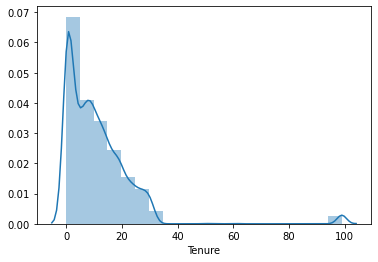

In [50]:
#Distribution plot for Tenure
sns.distplot(churn_data.Tenure, bins=20)

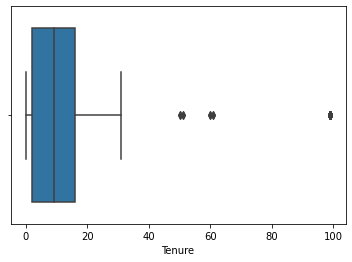

In [51]:
#boxplot for Tenure
sns.boxplot(churn_data.Tenure)

To impute missing values for Tenure attribute, we use median to replace the missing values, since it has a skewed distribution

In [52]:
churn_data["Tenure"] = churn_data["Tenure"].replace(np.NaN, churn_data["Tenure"].median()) 

In [53]:
churn_data["Tenure"].isnull().sum()

0

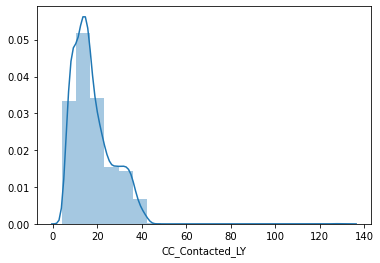

In [54]:
#Distribution plot for CC_Contacted_LY
sns.distplot(churn_data.CC_Contacted_LY, bins=20)

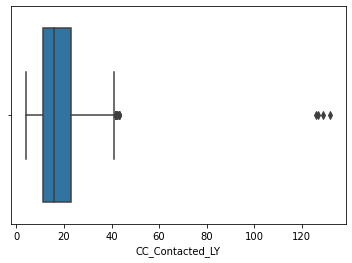

In [55]:
#boxplot for CC_Contacted_Ly
sns.boxplot(churn_data.CC_Contacted_LY)

To impute missing values for CC_Contacted_LY attribute, we use median to replace the missing values since it is a skewed distribution

In [56]:
churn_data["CC_Contacted_LY"] = churn_data["CC_Contacted_LY"].replace(np.NaN, churn_data["CC_Contacted_LY"].median()) 

In [57]:
churn_data["CC_Contacted_LY"].isnull().sum()

0

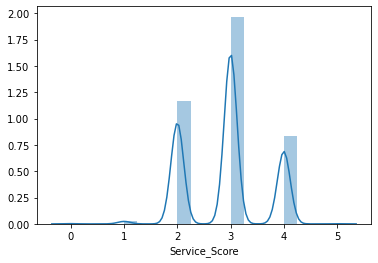

In [58]:
#Distribution plot for Service_Score
sns.distplot(churn_data.Service_Score, bins=20)

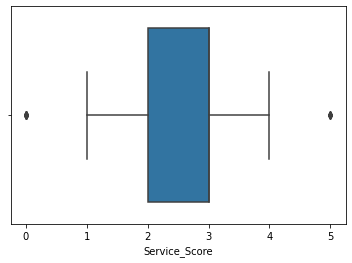

In [59]:
#boxplot for Service_Score
sns.boxplot(churn_data.Service_Score)

In [60]:
#dealing missing value with most common value occuring in this column
churn_data['Service_Score'].fillna(3, inplace = True) 

In [61]:
churn_data["Service_Score"].isnull().sum()

0

In [62]:
churn_data['Service_Score'].value_counts()

3.0    5458
2.0    3183
4.0    2270
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

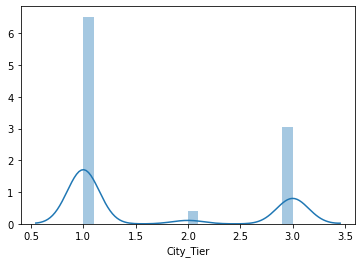

In [63]:
#Distribution plot for City_Tier
sns.distplot(churn_data.City_Tier, bins=20)

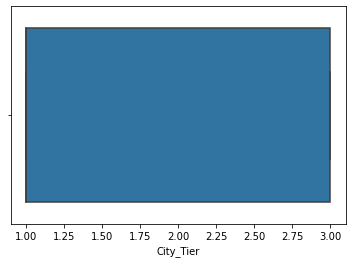

In [64]:
#boxplot for City_Tier
sns.boxplot(churn_data.City_Tier)

In [65]:
#dealing missing value with most common value occuring in this column
churn_data['City_Tier'].fillna(1, inplace = True) 

In [66]:
churn_data["City_Tier"].isnull().sum()

0

In [67]:
churn_data["City_Tier"].value_counts()

1.0    7209
3.0    3336
2.0     456
Name: City_Tier, dtype: int64

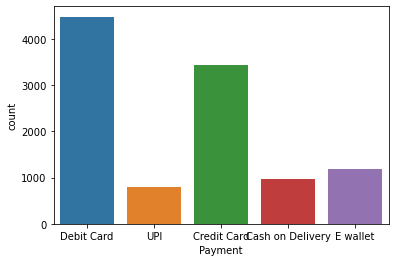

In [68]:
#count plot for Payment column
sns.countplot(data = churn_data, x = 'Payment')

In [69]:
# also use underscore for renaming 
churn_data['Payment'] = churn_data['Payment'].replace(['Debit Card'],'Debit_Card')
churn_data['Payment'] = churn_data['Payment'].replace(['Cash on Delivery'],'COD') 
churn_data['Payment'] = churn_data['Payment'].replace(['E wallet'],'E_wallet')
churn_data['Payment'] = churn_data['Payment'].replace(['Credit Card'],'Credit_Card') 

In [70]:
churn_data['Payment'].fillna('Debit_Card', inplace = True) 

In [71]:
churn_data['Payment'].value_counts()

Debit_Card     4593
Credit_Card    3441
E_wallet       1195
COD             977
UPI             795
Name: Payment, dtype: int64

In [72]:
churn_data['Payment'].isnull().sum()

0

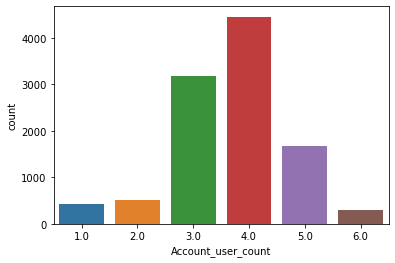

In [73]:
#Count plot for Account_user_count
sns.countplot(data = churn_data, x = 'Account_user_count')

In [74]:
churn_data['Account_user_count'].value_counts()

4.0    4454
3.0    3181
5.0    1665
2.0     517
1.0     435
6.0     305
Name: Account_user_count, dtype: int64

In [75]:
churn_data["Account_user_count"].isnull().sum()

444

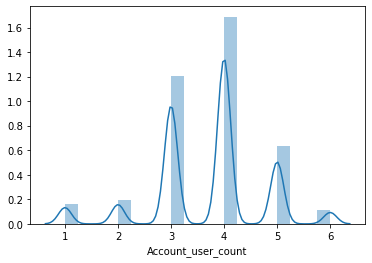

In [76]:
#Distribution plot for Account_user_count
sns.distplot(churn_data.Account_user_count, bins=20)

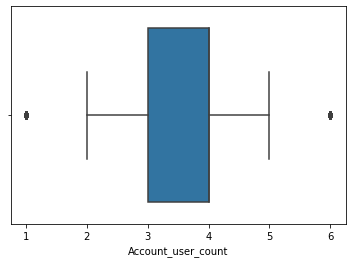

In [77]:
#boxplot for Service_Score
sns.boxplot(churn_data.Account_user_count)

In [78]:
#we will replace blank value by 1, since if an account exists then atleast 1 user is tagged with the account
churn_data['Account_user_count'].fillna(1, inplace = True) 

In [79]:
churn_data["Account_user_count"].value_counts()

4.0    4454
3.0    3181
5.0    1665
1.0     879
2.0     517
6.0     305
Name: Account_user_count, dtype: int64

In [80]:
churn_data["Account_user_count"].isnull().sum()

0

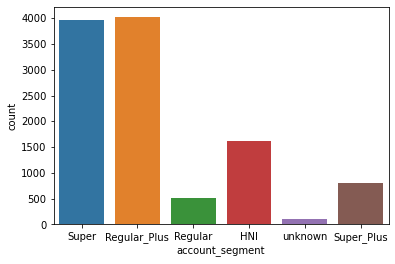

In [81]:
#Count plot for Account_user_count
sns.countplot(data = churn_data, x = 'account_segment')

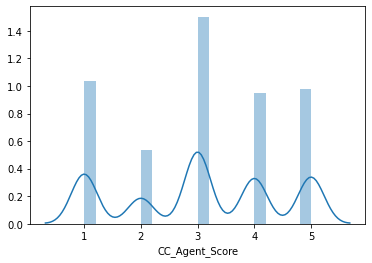

In [82]:
#Distribution plot for CC_Agent_Score
sns.distplot(churn_data.CC_Agent_Score, bins=20)

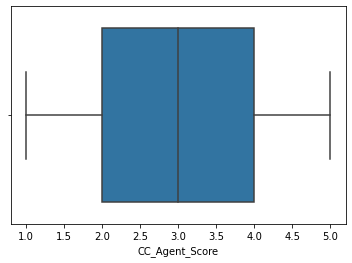

In [83]:
#boxplot for CC_Agent_Score
sns.boxplot(churn_data.CC_Agent_Score)

In [84]:
churn_data["CC_Agent_Score"].isnull().sum()

116

In [85]:
#Replacing null values with frequently occuring value
churn_data['CC_Agent_Score'].fillna(3, inplace = True)

In [86]:
churn_data["CC_Agent_Score"].value_counts()

3.0    3386
1.0    2261
5.0    2126
4.0    2064
2.0    1164
Name: CC_Agent_Score, dtype: int64

In [87]:
churn_data["CC_Agent_Score"].isnull().sum()

0

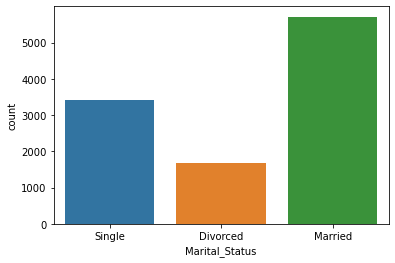

In [88]:
#count plot for Marital_Status column
sns.countplot(data = churn_data, x = 'Marital_Status')

In [89]:
churn_data['Marital_Status'].fillna('Married', inplace = True)

In [90]:
churn_data['Marital_Status'].value_counts()

Married     5921
Single      3412
Divorced    1668
Name: Marital_Status, dtype: int64

In [91]:
churn_data['Marital_Status'].isnull().sum()

0

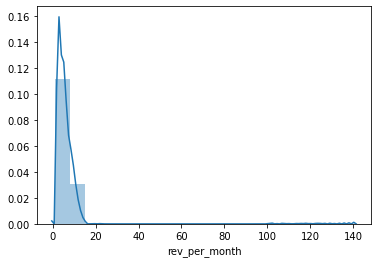

In [92]:
#Distribution plot for rev_per_month
sns.distplot(churn_data.rev_per_month, bins=20)

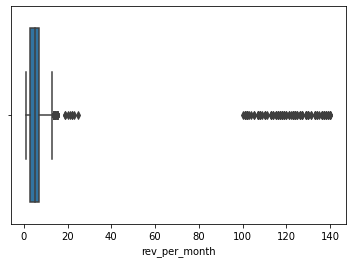

In [93]:
#boxplot for rev_per_month
sns.boxplot(churn_data.rev_per_month)

In [94]:
#since it is a skewed distribution, we will replace null values using median
churn_data["rev_per_month"] = churn_data["rev_per_month"].replace(np.NaN, churn_data["rev_per_month"].median())

In [95]:
churn_data['rev_per_month'].isnull().sum()

0

In [96]:
churn_data['Complain_ly'].value_counts()

0.0    7602
1.0    3042
Name: Complain_ly, dtype: int64

In [97]:
churn_data['Complain_ly'].isnull().sum()

357

In [98]:
churn_data['Complain_ly'].fillna(0, inplace = True)

In [99]:
churn_data['Complain_ly'].value_counts()

0.0    7959
1.0    3042
Name: Complain_ly, dtype: int64

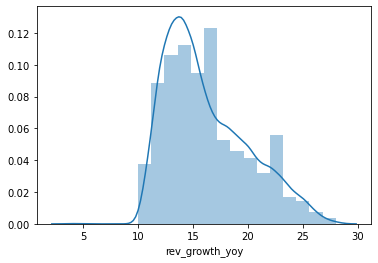

In [100]:
#Distribution plot for rev_growth_yoy
sns.distplot(churn_data.rev_growth_yoy, bins=20)

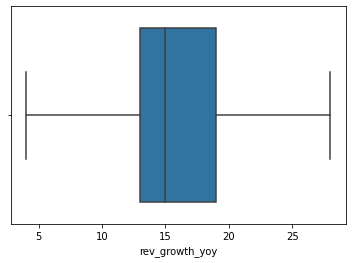

In [101]:
#boxplot for rev_growth_yoy
sns.boxplot(churn_data.rev_growth_yoy)

In [102]:
churn_data['rev_growth_yoy'].isnull().sum()

3

In [103]:
#since it is a skewed distribution, we will replace null values using median
churn_data["rev_growth_yoy"] = churn_data["rev_growth_yoy"].replace(np.NaN, churn_data["rev_growth_yoy"].median())

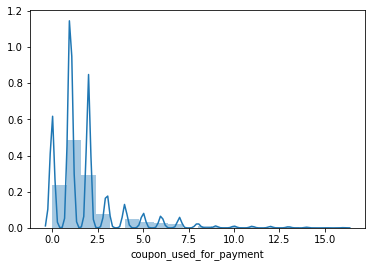

In [104]:
#Distribution plot for coupon_used_for_payment
sns.distplot(churn_data.coupon_used_for_payment, bins=20)

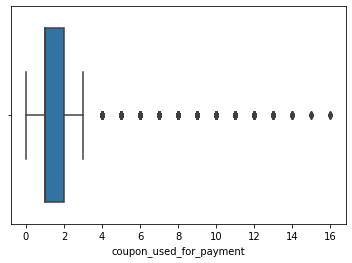

In [105]:
#boxplot for coupon_used_for_payment
sns.boxplot(churn_data.coupon_used_for_payment)

In [106]:
churn_data['coupon_used_for_payment'].isnull().sum()

3

In [107]:
#since it is a skewed distribution, we will replace null values using median
churn_data["coupon_used_for_payment"] = churn_data["coupon_used_for_payment"].replace(np.NaN, churn_data["coupon_used_for_payment"].median())

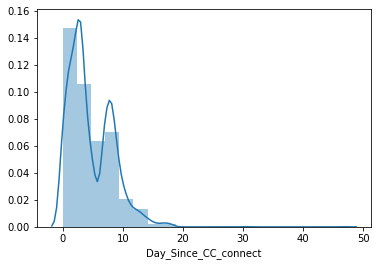

In [108]:
#Distribution plot for Day_Since_CC_connect
sns.distplot(churn_data.Day_Since_CC_connect, bins=20)

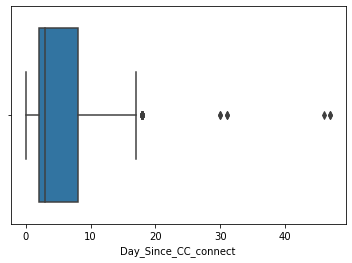

In [109]:
#boxplot for Day_Since_CC_connect
sns.boxplot(churn_data.Day_Since_CC_connect)

In [110]:
churn_data['Day_Since_CC_connect'].isnull().sum()

358

In [111]:
#since it is a skewed distribution, we will replace null values using median
churn_data["Day_Since_CC_connect"] = churn_data["Day_Since_CC_connect"].replace(np.NaN, churn_data["Day_Since_CC_connect"].median())

In [112]:
churn_data['Day_Since_CC_connect'].isnull().sum()

0

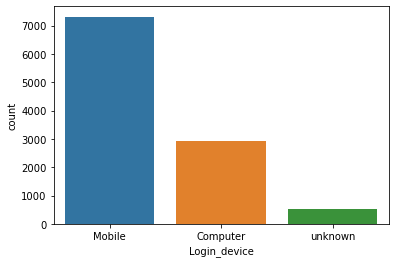

In [113]:
#count plot for Login_device column
sns.countplot(data = churn_data, x = 'Login_device')

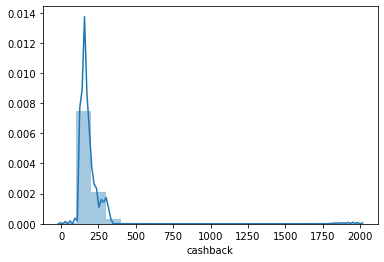

In [114]:
#Distribution plot for cashback
sns.distplot(churn_data.cashback, bins=20)

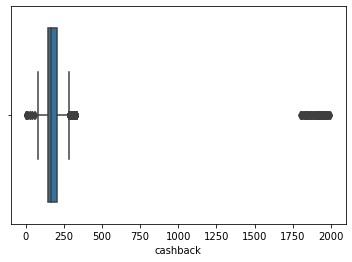

In [115]:
#boxplot for cashback
sns.boxplot(churn_data.cashback)

In [116]:
churn_data['cashback'].isnull().sum()

473

In [117]:
#since it is a skewed distribution, we will replace null values using median
churn_data["cashback"] = churn_data["cashback"].replace(np.NaN, churn_data["cashback"].median())

In [118]:
churn_data['cashback'].isnull().sum()

0

In [119]:
churn_data['Churn'].value_counts()

0    9149
1    1852
Name: Churn, dtype: int64

In [120]:
churn_data["Churn"].value_counts(normalize=True)

0    0.831652
1    0.168348
Name: Churn, dtype: float64

Data is imbalanced

**Bivariate Analysis**

Bar plot to check count of tenure as per account segment

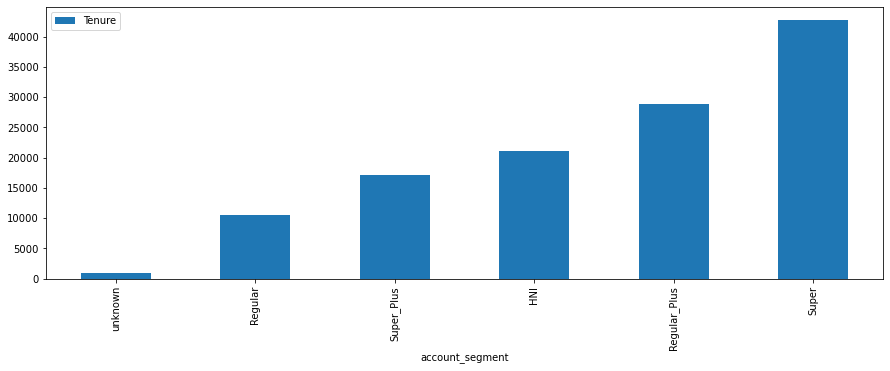

In [121]:
churn_data.groupby(by=['account_segment'])['Tenure'].sum().reset_index().sort_values(['Tenure']).tail(6).plot(x='account_segment',
                                                                                                           y='Tenure',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

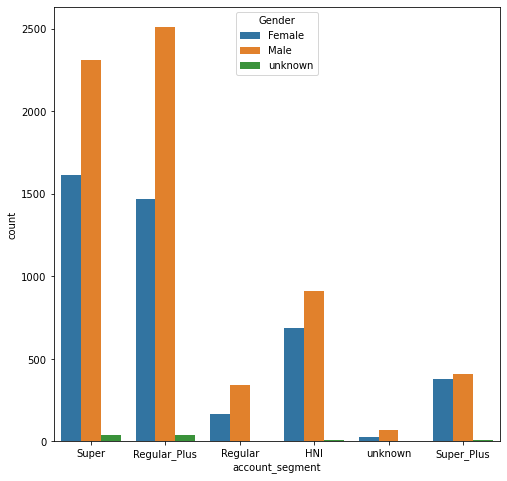

In [122]:
plt.figure(figsize=(8,8))
sns.countplot(churn_data['account_segment'],hue=churn_data['Gender'])
plt.show()

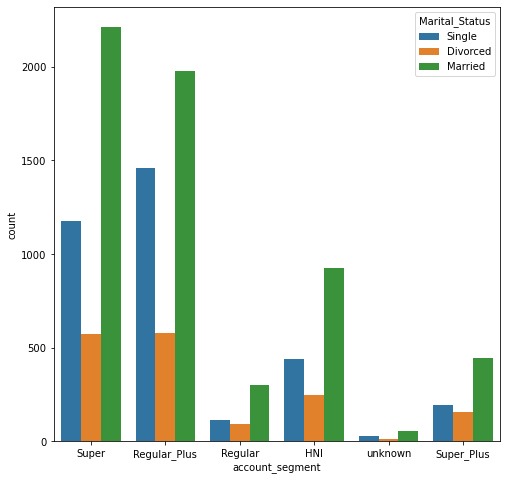

In [123]:
plt.figure(figsize=(8,8))
sns.countplot(churn_data['account_segment'],hue=churn_data['Marital_Status'])
plt.show()

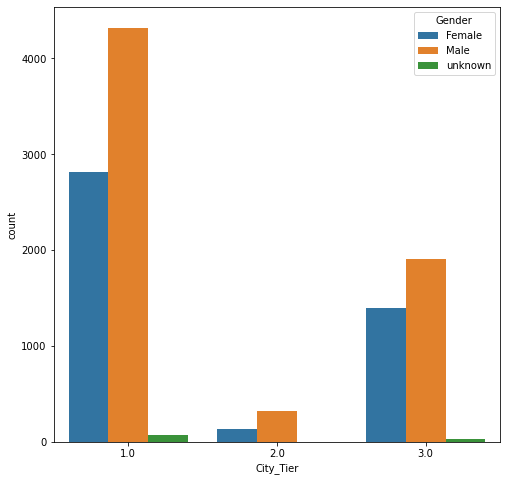

In [124]:
plt.figure(figsize=(8,8))
sns.countplot(churn_data['City_Tier'],hue=churn_data['Gender'])
plt.show()

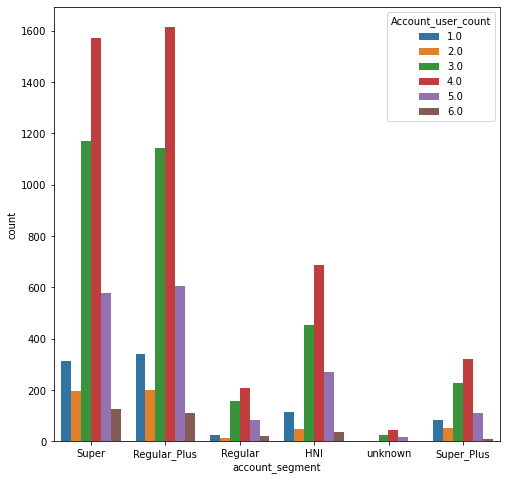

In [125]:
plt.figure(figsize=(8,8))
sns.countplot(churn_data['account_segment'],hue=churn_data['Account_user_count'])
plt.show()

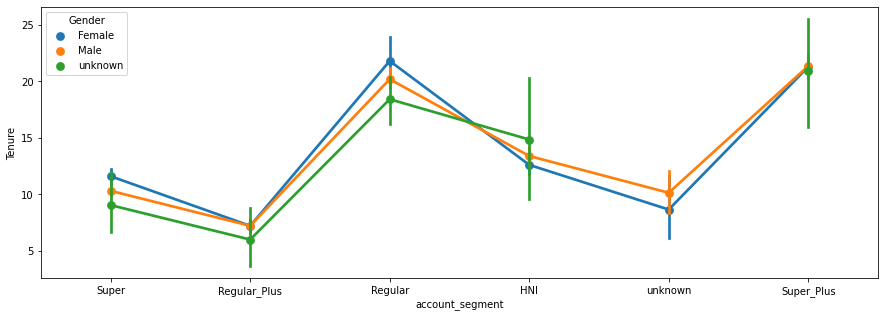

In [126]:
plt.figure(figsize=(15,5))

sns.pointplot(x="account_segment", y="Tenure", hue = 'Gender',  data=churn_data)
plt.show()

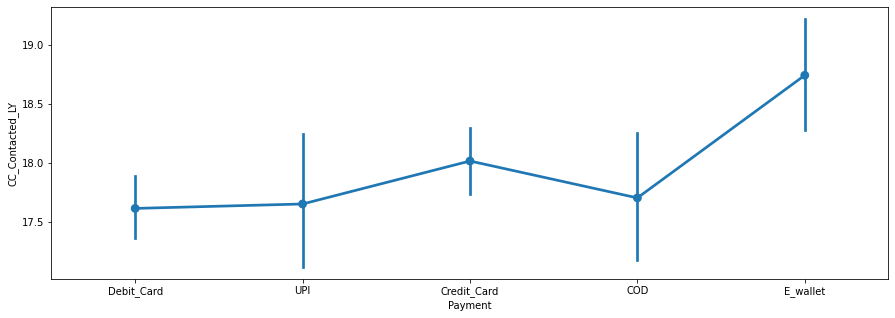

In [127]:
plt.figure(figsize=(15,5))

sns.pointplot(x="Payment", y="CC_Contacted_LY",  data=churn_data)
plt.show()

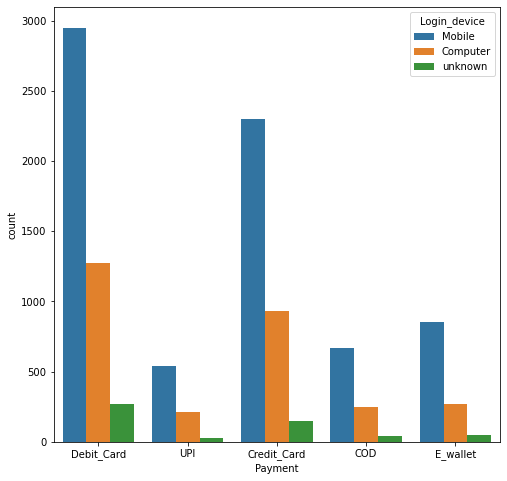

In [128]:
plt.figure(figsize=(8,8))
sns.countplot(churn_data['Payment'],hue=churn_data['Login_device'])
plt.show()

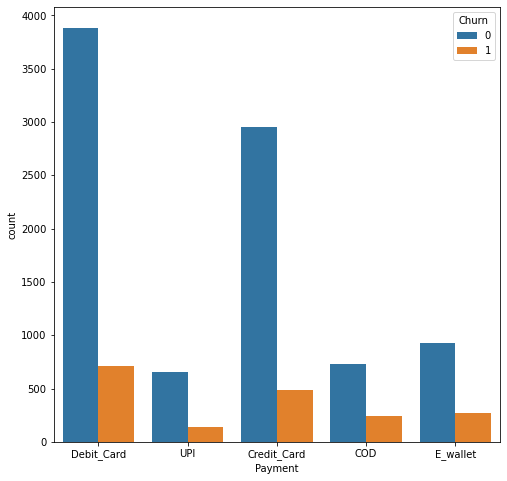

In [129]:
plt.figure(figsize=(8,8))
sns.countplot(churn_data['Payment'],hue=churn_data['Churn'])
plt.show()

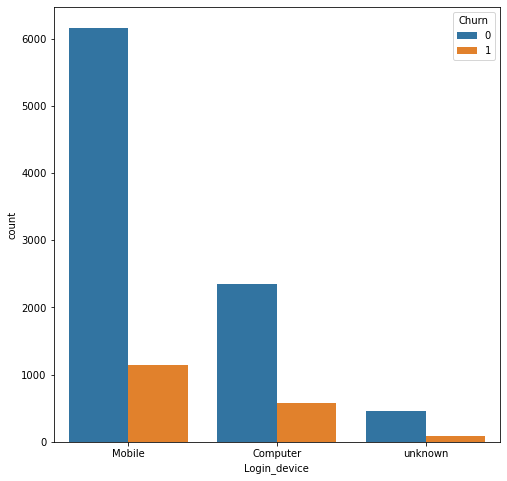

In [130]:
plt.figure(figsize=(8,8))
sns.countplot(churn_data['Login_device'],hue=churn_data['Churn'])
plt.show()

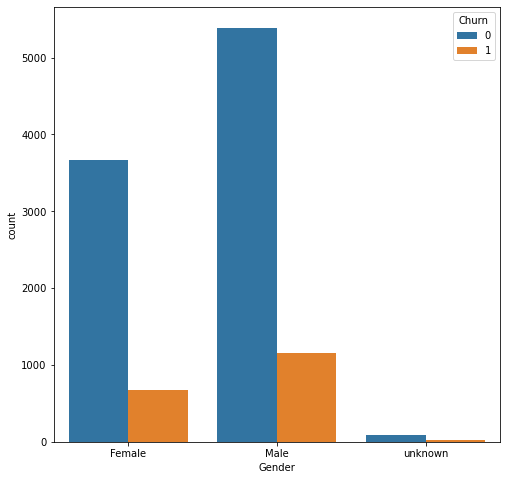

In [131]:
plt.figure(figsize=(8,8))
sns.countplot(churn_data['Gender'],hue=churn_data['Churn'])
plt.show()

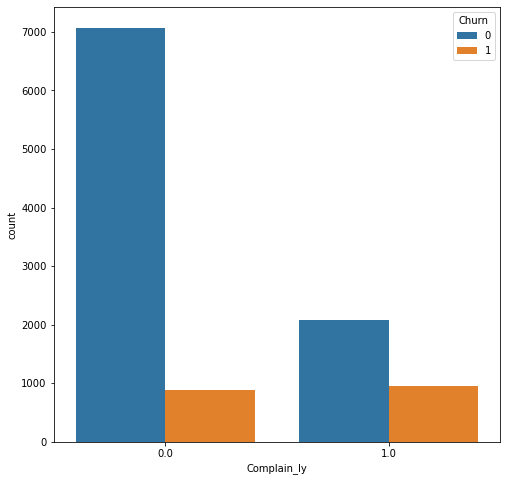

In [132]:
plt.figure(figsize=(8,8))
sns.countplot(churn_data['Complain_ly'],hue=churn_data['Churn'])
plt.show()

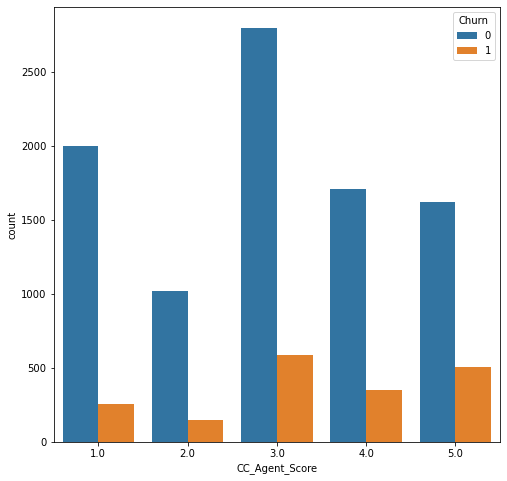

In [133]:
plt.figure(figsize=(8,8))
sns.countplot(churn_data['CC_Agent_Score'],hue=churn_data['Churn'])
plt.show()

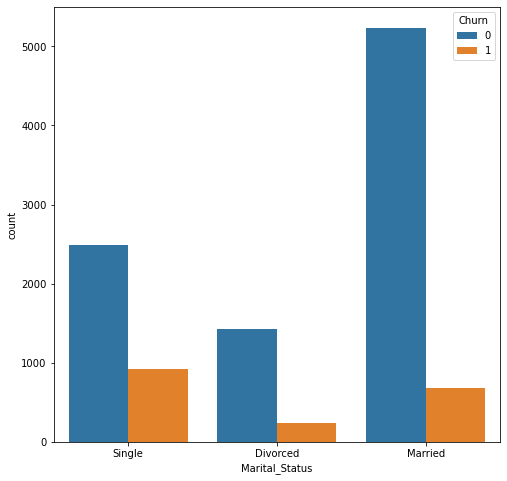

In [134]:
plt.figure(figsize=(8,8))
sns.countplot(churn_data['Marital_Status'],hue=churn_data['Churn'])
plt.show()

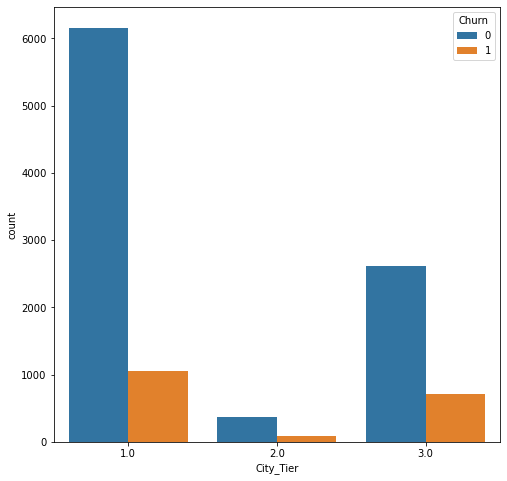

In [135]:
plt.figure(figsize=(8,8))
sns.countplot(churn_data['City_Tier'],hue=churn_data['Churn'])
plt.show()

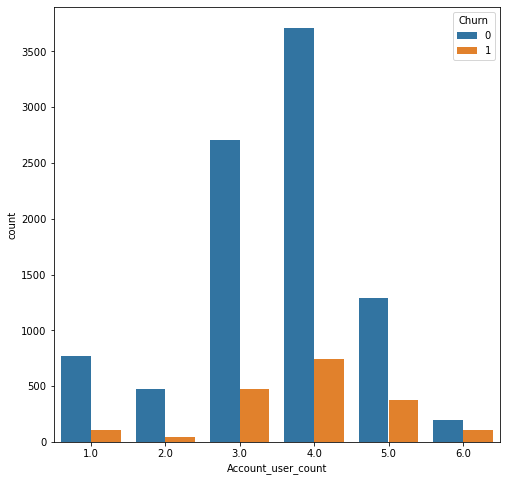

In [136]:
plt.figure(figsize=(8,8))
sns.countplot(churn_data['Account_user_count'],hue=churn_data['Churn'])
plt.show()

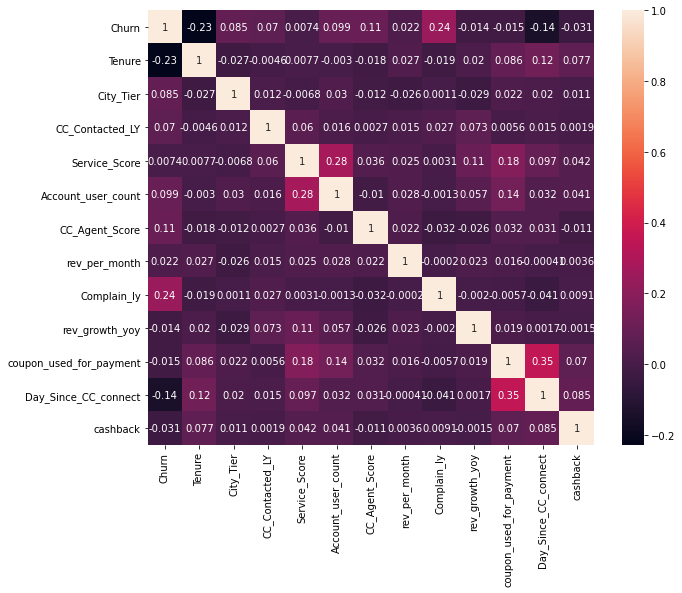

In [137]:
plt.figure(figsize=(10,8))
sns.heatmap(churn_data.corr(),annot=True)
plt.show()

In [138]:
churn_data.corr()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
Churn,1.000000,-0.229403,0.084832,0.070369,0.007389,0.099323,0.105795,0.022409,0.244353,-0.014281,-0.014664,-0.144445,-0.031128
Tenure,-0.229403,1.000000,-0.027197,-0.004624,0.007688,-0.002965,-0.017611,0.027244,-0.019120,0.020028,0.086085,0.121495,0.077097
City_Tier,0.084832,-0.027197,1.000000,0.011695,-0.006825,0.029631,-0.011754,-0.025673,0.001104,-0.029221,0.022047,0.020012,0.010686
CC_Contacted_LY,0.070369,-0.004624,0.011695,1.000000,0.060245,0.016340,0.002676,0.014676,0.027267,0.072699,0.005595,0.014501,0.001872
Service_Score,0.007389,0.007688,-0.006825,0.060245,1.000000,0.275801,0.035623,0.025353,0.003070,0.105064,0.179476,0.096964,0.041620
Account_user_count,0.099323,-0.002965,0.029631,0.016340,0.275801,1.000000,-0.010095,0.027849,-0.001320,0.057039,0.135103,0.032026,0.040787
CC_Agent_Score,0.105795,-0.017611,-0.011754,0.002676,0.035623,-0.010095,1.000000,0.021947,-0.031558,-0.025645,0.032133,0.031020,-0.011025
rev_per_month,0.022409,0.027244,-0.025673,0.014676,0.025353,0.027849,0.021947,1.000000,-0.000198,0.023018,0.015521,-0.000409,0.003611
Complain_ly,0.244353,-0.019120,0.001104,0.027267,0.003070,-0.001320,-0.031558,-0.000198,1.000000,-0.002005,-0.005698,-0.041343,0.009109
rev_growth_yoy,-0.014281,0.020028,-0.029221,0.072699,0.105064,0.057039,-0.025645,0.023018,-0.002005,1.000000,0.019093,0.001661,-0.001477


**Outlier Treatment**

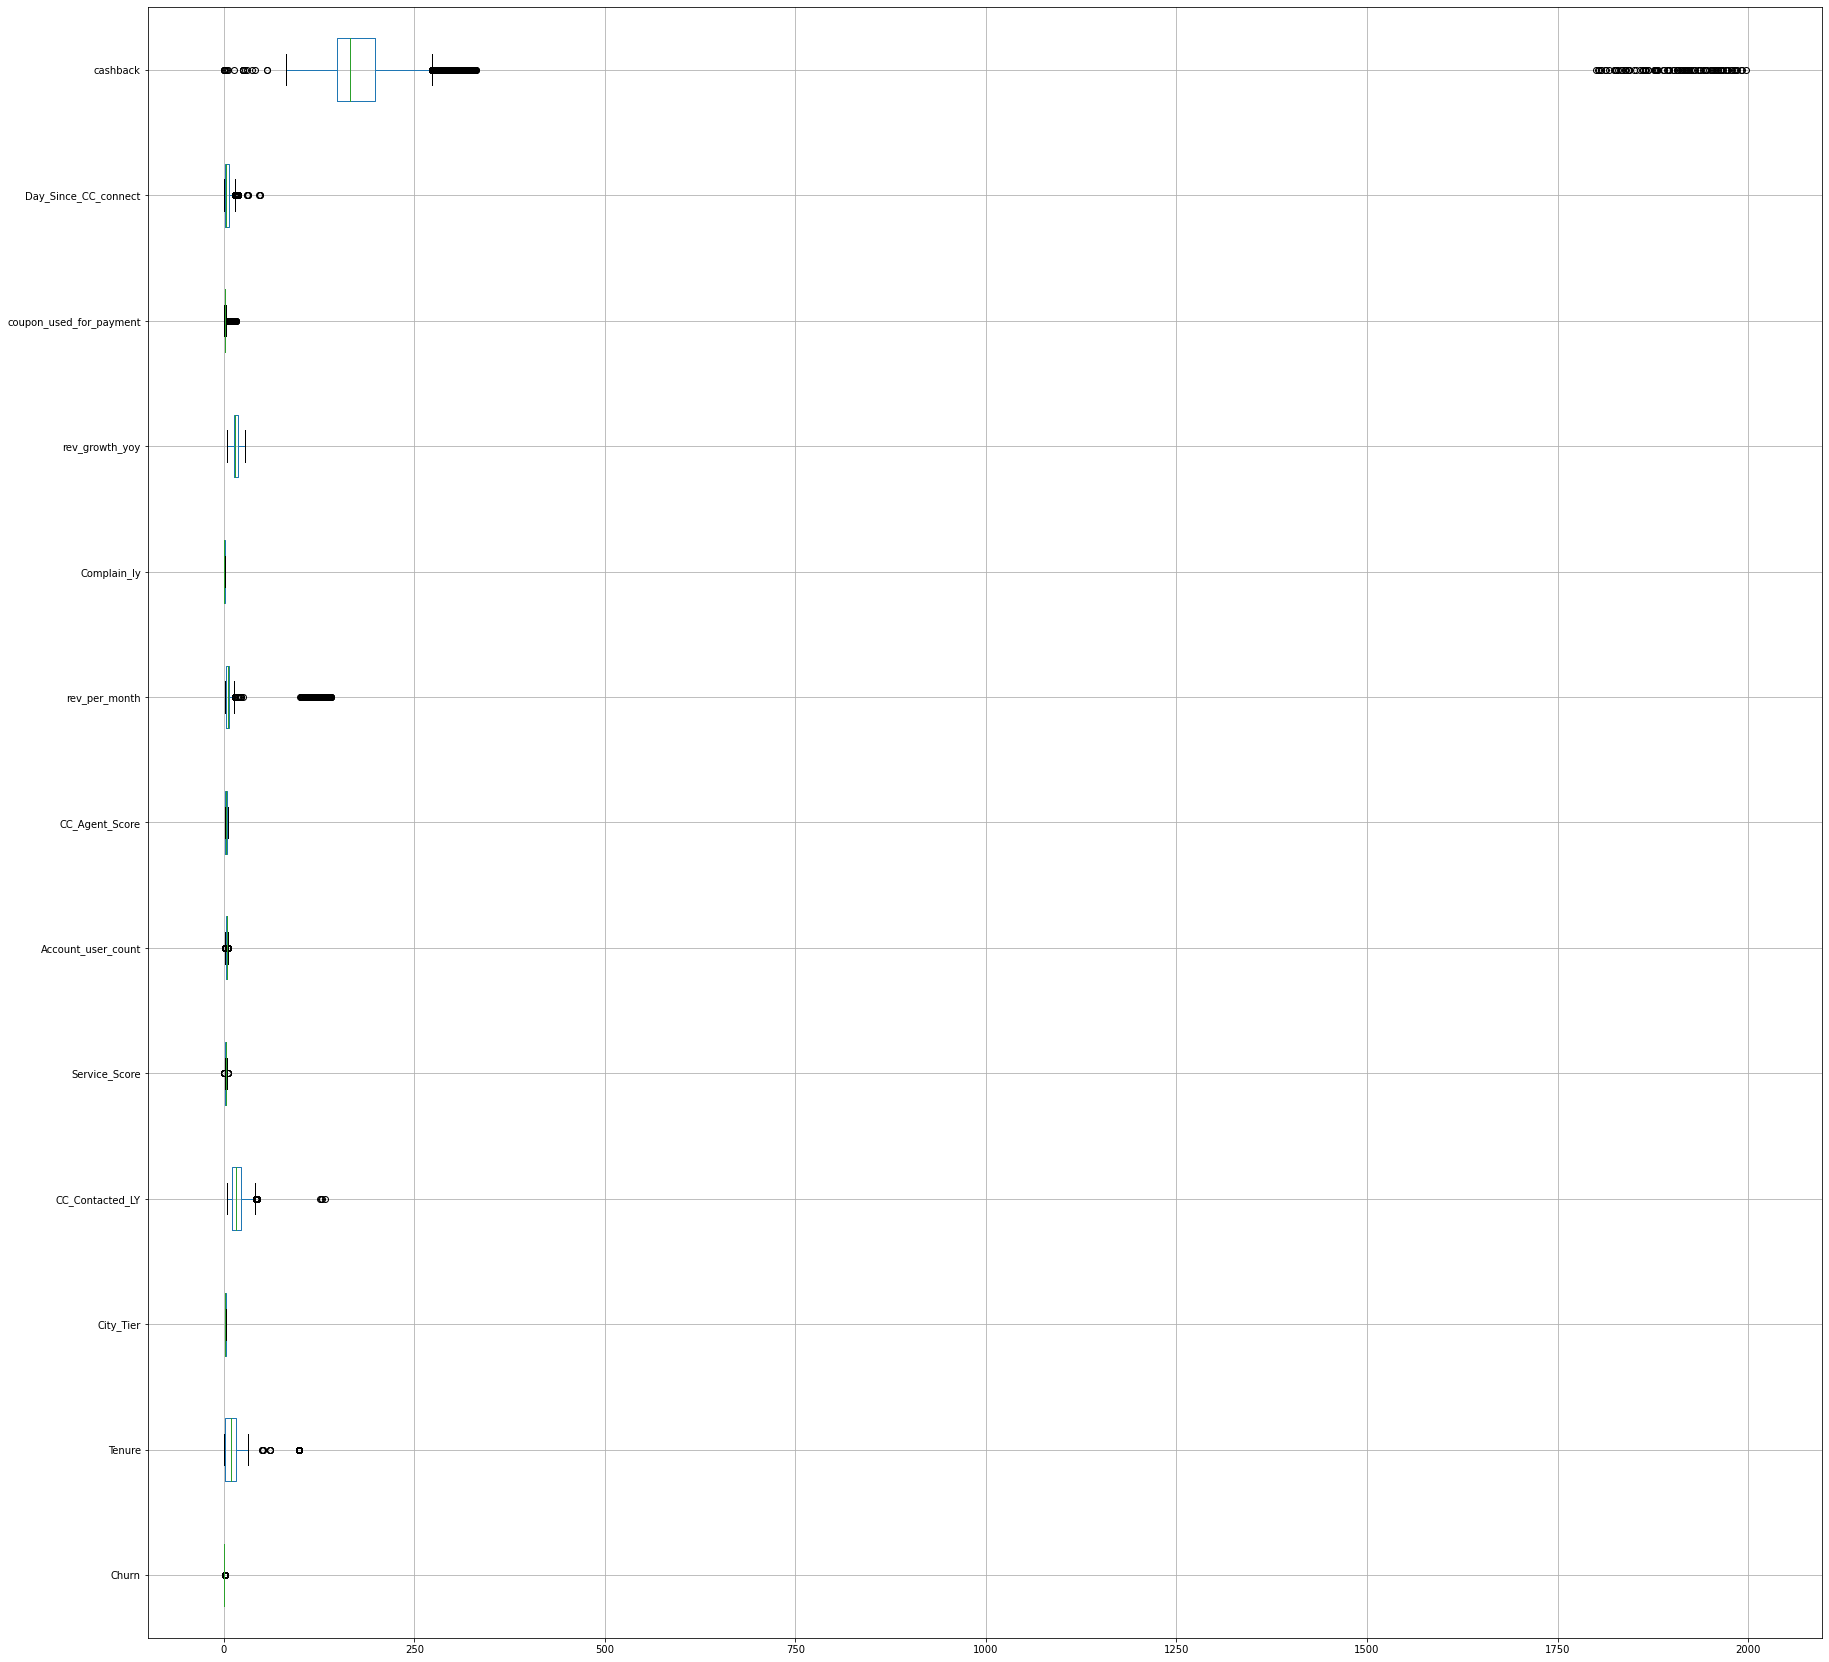

In [139]:
#Checking outliers
# construct box plot for continuous variables
plt.figure(figsize=(30,30))
churn_data.boxplot(vert=0)
plt.show()

We will treat outliers for cashback, days_since_cc_connect, coupon_used_for_payment, rev_per_month, CC_Contacted_LY, Tenure. We will not treat outliers for account user count and and service score as they are ratings

In [140]:
def remove_outlier(col):
     sorted(col)
     Q1,Q3=np.percentile(col,[25,75])
     IQR=Q3-Q1
     lower_range= Q1-(1.5 * IQR)
     upper_range= Q3+(1.5 * IQR)
     return lower_range, upper_range

In [141]:
lr,ur=remove_outlier(churn_data["cashback"])
churn_data["cashback"]=np.where(churn_data["cashback"]>ur,ur,churn_data["cashback"])
churn_data["cashback"]=np.where(churn_data["cashback"]<lr,lr,churn_data["cashback"])


lr,ur=remove_outlier(churn_data["Day_Since_CC_connect"])
churn_data["Day_Since_CC_connect"]=np.where(churn_data["Day_Since_CC_connect"]>ur,ur,churn_data["Day_Since_CC_connect"])
churn_data["Day_Since_CC_connect"]=np.where(churn_data["Day_Since_CC_connect"]<lr,lr,churn_data["Day_Since_CC_connect"]) 

lr,ur=remove_outlier(churn_data["coupon_used_for_payment"])
churn_data["coupon_used_for_payment"]=np.where(churn_data["coupon_used_for_payment"]>ur,ur,churn_data["coupon_used_for_payment"])
churn_data["coupon_used_for_payment"]=np.where(churn_data["coupon_used_for_payment"]<lr,lr,churn_data["coupon_used_for_payment"])

lr,ur=remove_outlier(churn_data["rev_per_month"])
churn_data["rev_per_month"]=np.where(churn_data["rev_per_month"]>ur,ur,churn_data["rev_per_month"])
churn_data["rev_per_month"]=np.where(churn_data["rev_per_month"]<lr,lr,churn_data["rev_per_month"]) 

lr,ur=remove_outlier(churn_data["CC_Contacted_LY"])
churn_data["CC_Contacted_LY"]=np.where(churn_data["CC_Contacted_LY"]>ur,ur,churn_data["CC_Contacted_LY"])
churn_data["CC_Contacted_LY"]=np.where(churn_data["CC_Contacted_LY"]<lr,lr,churn_data["CC_Contacted_LY"]) 

lr,ur=remove_outlier(churn_data["Tenure"])
churn_data["Tenure"]=np.where(churn_data["Tenure"]>ur,ur,churn_data["Tenure"])
churn_data["Tenure"]=np.where(churn_data["Tenure"]<lr,lr,churn_data["Tenure"]) 

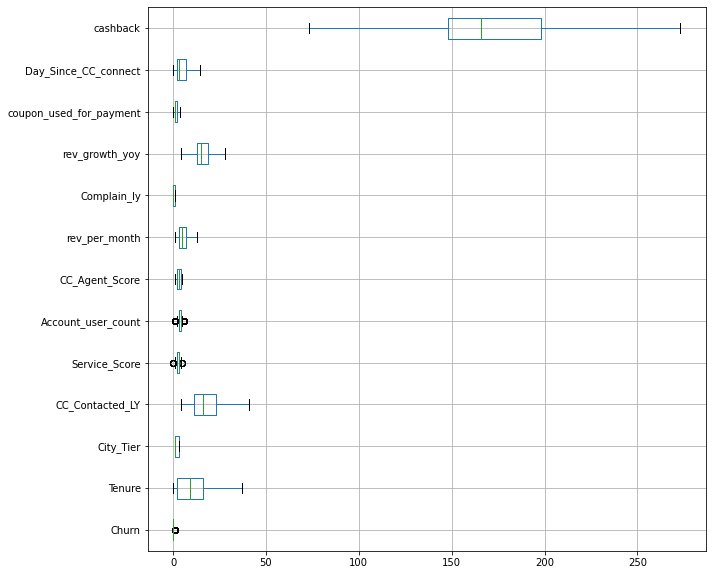

In [142]:
#Checking outliers
#construct box plot for continuous variables
plt.figure(figsize=(10,10))
churn_data.boxplot(vert=0)
plt.show()

**Variable Transformation**

In [143]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
churn_data['Payment'] = labelencoder.fit_transform(churn_data['Payment'])
churn_data['Gender'] = labelencoder.fit_transform(churn_data['Gender'])
churn_data['account_segment'] = labelencoder.fit_transform(churn_data['account_segment'])
churn_data['Marital_Status'] = labelencoder.fit_transform(churn_data['Marital_Status'])
churn_data['Login_device'] = labelencoder.fit_transform(churn_data['Login_device'])

In [144]:
churn_data.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,2,0,3.0,3.0,3,2.0,2,9.0,1.0,11.0,1.0,5.0,159.93,1
1,1,0.0,1.0,8.0,4,1,3.0,4.0,2,3.0,2,7.0,1.0,15.0,0.0,0.0,120.90,1
2,1,0.0,1.0,30.0,2,1,2.0,4.0,2,3.0,2,6.0,1.0,14.0,0.0,3.0,165.63,1
3,1,0.0,3.0,15.0,2,1,2.0,4.0,3,5.0,2,8.0,0.0,23.0,0.0,3.0,134.07,1
4,1,0.0,1.0,12.0,1,1,2.0,3.0,2,5.0,2,3.0,0.0,11.0,1.0,3.0,129.60,1


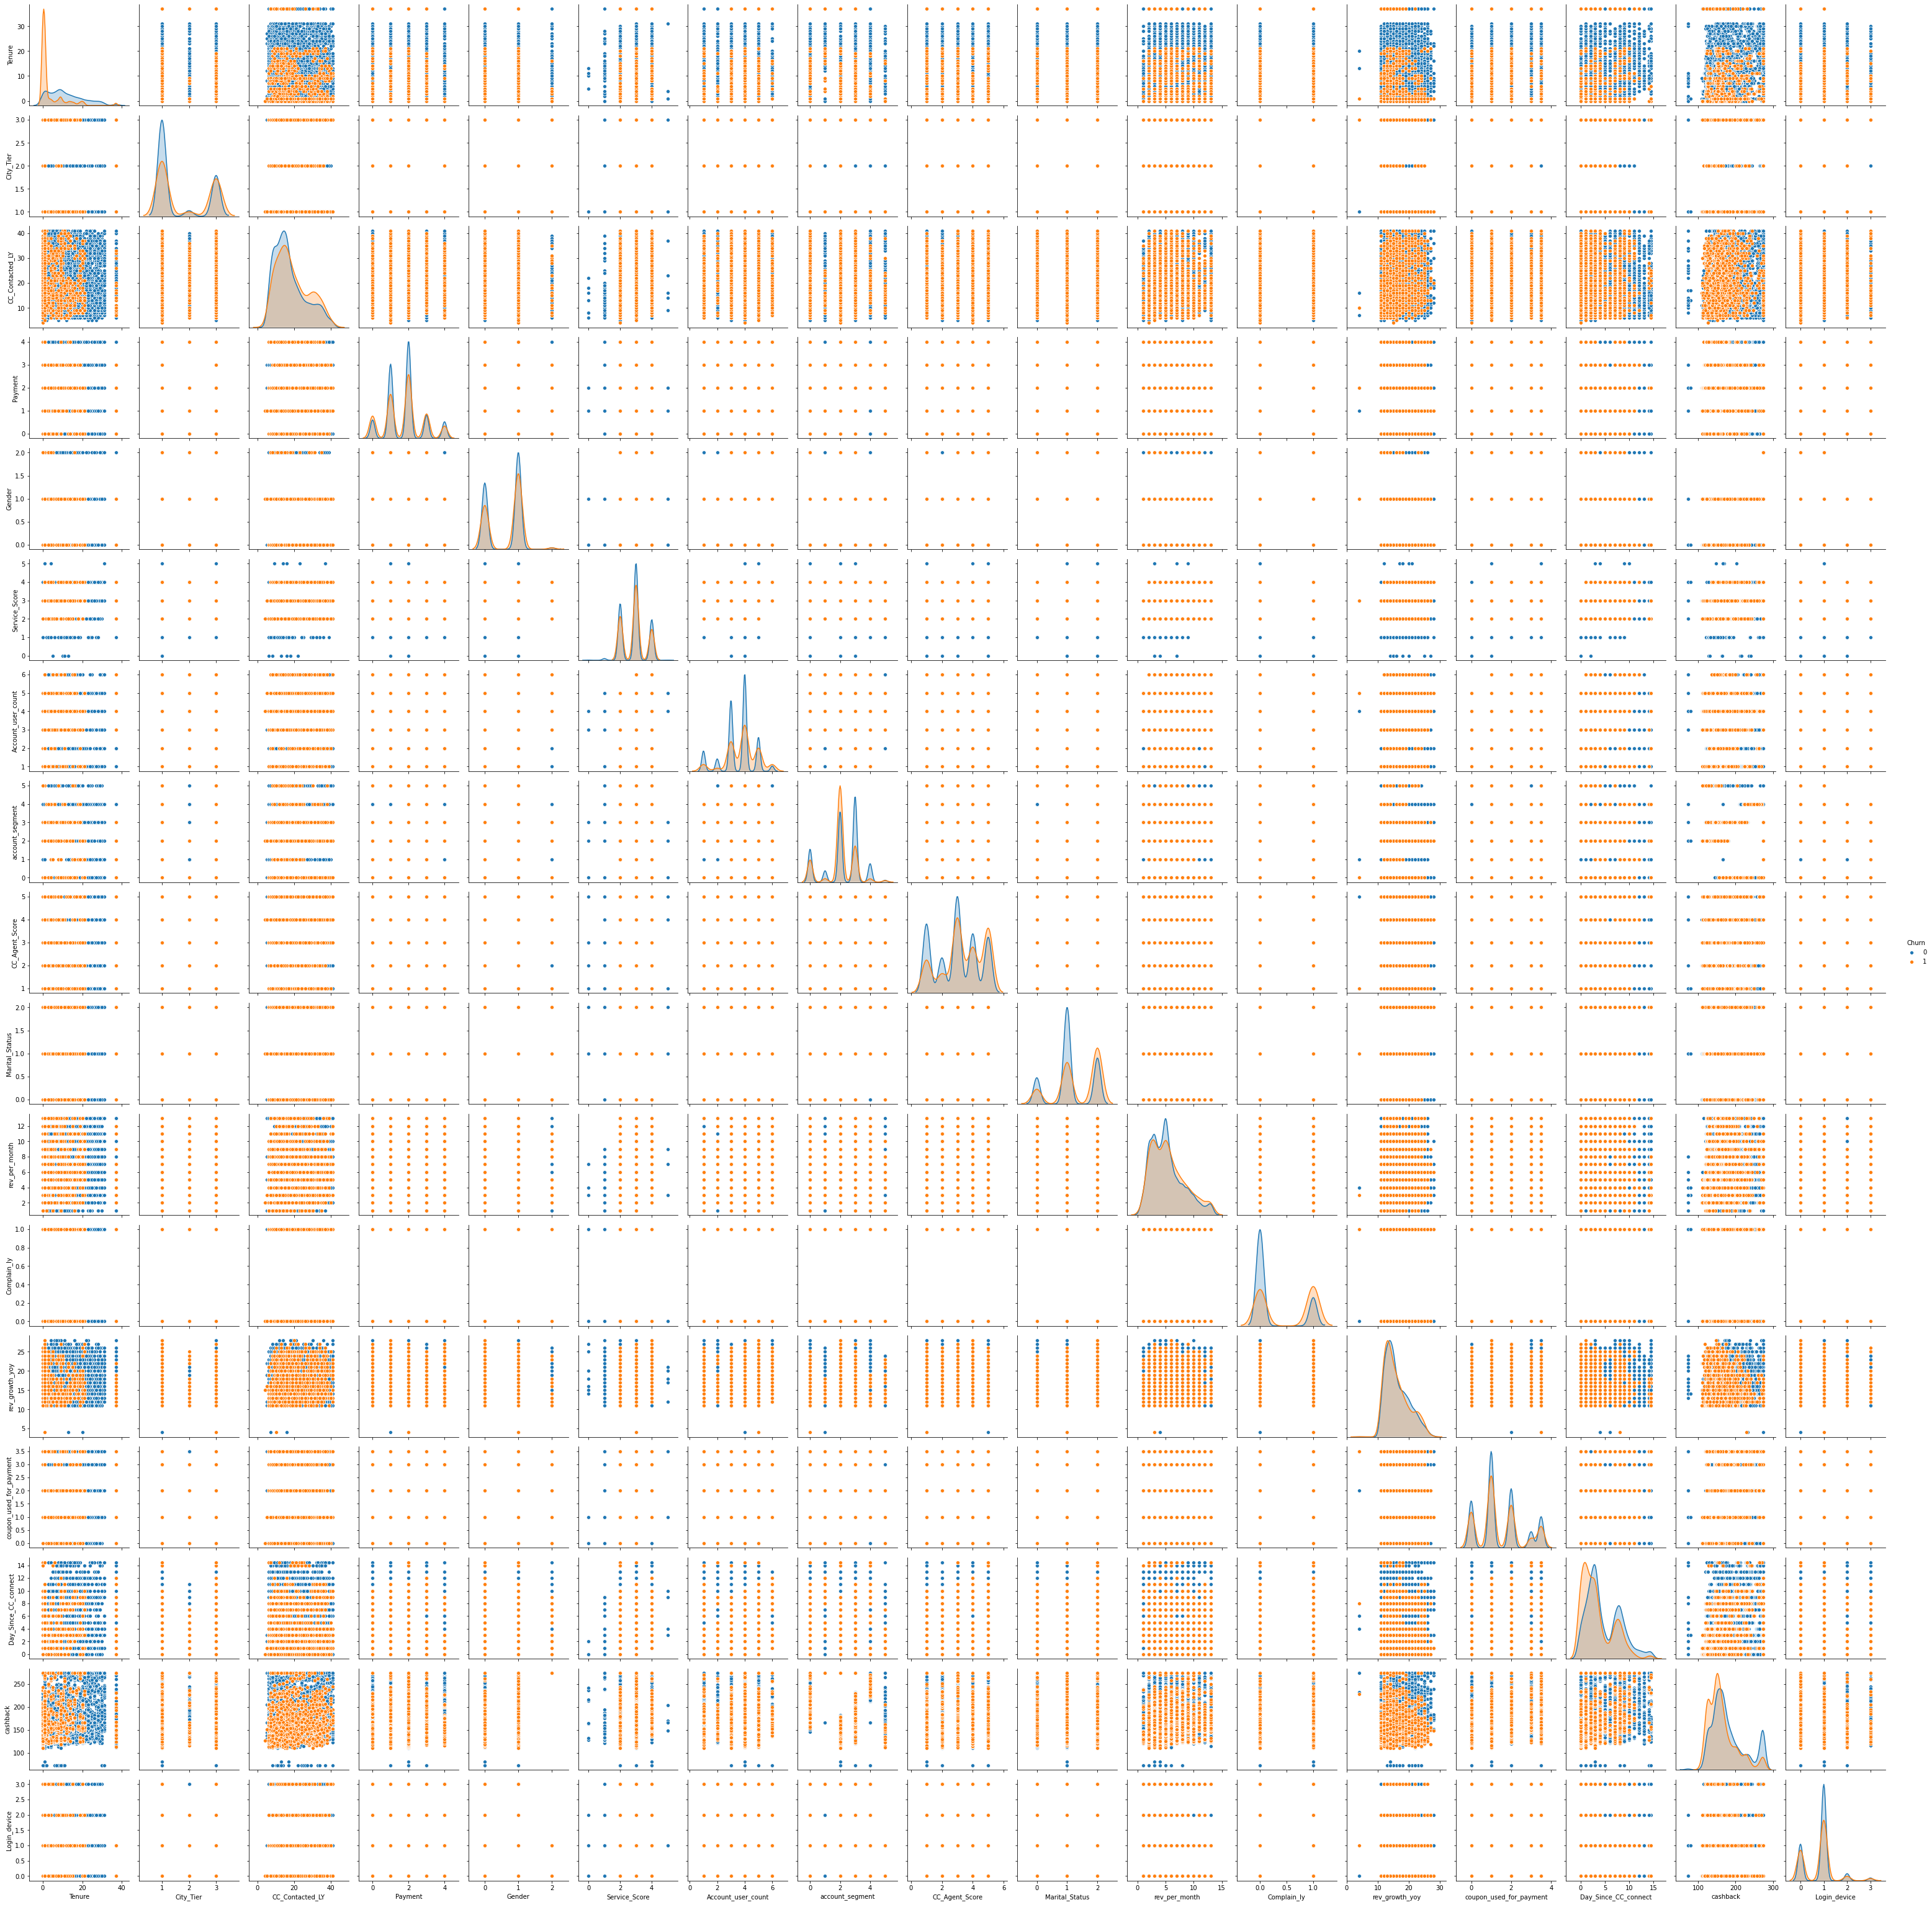

In [145]:
sns.pairplot(churn_data,hue="Churn")

**1. Model building and interpretation.**

*a) Build various models: Apply Logistic Regression and LDA (linear discriminant analysis).*

*Naïve Bayes Model. Interpret the results*

*Apply KNN Model*

In [146]:
X=churn_data.drop("Churn", axis=1)
Y=churn_data.pop("Churn")

In [147]:
X.shape

(11001, 17)

In [148]:
Y.shape

(11001,)

*Scale the data*

In [149]:
from scipy.stats import zscore

In [150]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4.0,3.0,6.0,2,0,3.0,3.0,3,2.0,2,9.0,1.0,11.0,1.0,5.0,159.93,1
1,0.0,1.0,8.0,4,1,3.0,4.0,2,3.0,2,7.0,1.0,15.0,0.0,0.0,120.90,1
2,0.0,1.0,30.0,2,1,2.0,4.0,2,3.0,2,6.0,1.0,14.0,0.0,3.0,165.63,1
3,0.0,3.0,15.0,2,1,2.0,4.0,3,5.0,2,8.0,0.0,23.0,0.0,3.0,134.07,1
4,0.0,1.0,12.0,1,1,2.0,3.0,2,5.0,2,3.0,0.0,11.0,1.0,3.0,129.60,1


In [151]:
X.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [152]:
# Applying Z score

X[['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device']]=X[['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device']].apply(zscore)

In [153]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,-0.704189,1.479979,-1.380526,0.236140,-1.214159,0.135956,-0.515055,0.700766,-0.770012,1.273428,1.295405,1.61752,-1.384988,-0.436018,0.126480,-0.404288,0.293908
1,-1.153115,-0.709243,-1.147274,2.226773,0.760555,0.135956,0.366969,-0.166988,-0.041708,1.273428,0.601043,1.61752,-0.321004,-1.341042,-1.305301,-1.292502,0.293908
2,-1.153115,-0.709243,1.418500,0.236140,0.760555,-1.247623,0.366969,-0.166988,-0.041708,1.273428,0.253861,1.61752,-0.587000,-1.341042,-0.446232,-0.274572,0.293908
3,-1.153115,1.479979,-0.330891,0.236140,0.760555,-1.247623,0.366969,0.700766,1.414899,1.273428,0.948224,-0.61823,1.806965,-1.341042,-0.446232,-0.992790,0.293908
4,-1.153115,-0.709243,-0.680769,-0.759177,0.760555,-1.247623,-0.515055,-0.166988,1.414899,1.273428,-0.787683,-0.61823,-1.384988,-0.436018,-0.446232,-1.094515,0.293908


**LDA**

In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [155]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=1)

In [156]:
X_train.shape

(7700, 17)

In [157]:
X_test.shape

(3301, 17)

In [158]:
#Build LDA Model
clf = LinearDiscriminantAnalysis() 
modelld=clf.fit(X_train,Y_train)

In [159]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = modelld.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = modelld.predict(X_test)

In [160]:
metrics.confusion_matrix(Y_train,pred_class_train)

array([[6232,  174],
       [ 798,  496]], dtype=int64)

In [161]:
metrics.confusion_matrix(Y_test,pred_class_test)

array([[2654,   89],
       [ 329,  229]], dtype=int64)

In [162]:
model_score = clf.score(X_train, Y_train)
print(model_score)

0.8737662337662337


In [163]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      6406
           1       0.74      0.38      0.51      1294

    accuracy                           0.87      7700
   macro avg       0.81      0.68      0.72      7700
weighted avg       0.86      0.87      0.86      7700
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2743
           1       0.72      0.41      0.52       558

    accuracy                           0.87      3301
   macro avg       0.80      0.69      0.72      3301
weighted avg       0.86      0.87      0.86      3301
 



In [164]:
lda_metrics=classification_report(Y_train,pred_class_train,output_dict=True)
dfld=pd.DataFrame(lda_metrics).transpose()
lda_train_precision_con=round(dfld.iloc[0][0],2)
lda_train_recall_con=round(dfld.iloc[0][1],2)
lda_train_f1_con=round(dfld.iloc[0][2],2)
lda_train_acc=round(dfld.loc["accuracy"][0],2)
print ('lda_train_precision Retain',lda_train_precision_con)
print ('lda_train_recall Retain',lda_train_recall_con)
print ('lda_train_f1 Retain',lda_train_f1_con)
print ('lda_train_accuracy ',lda_train_acc)
lda_train_precision_lab=round(dfld.iloc[1][0],2)
lda_train_recall_lab=round(dfld.iloc[1][1],2)
lda_train_f1_lab=round(dfld.iloc[1][2],2)
print ('lda_train_precision churn',lda_train_precision_lab)
print ('lda_train_recall churn',lda_train_recall_lab)
print ('lda_train_f1 churn',lda_train_f1_lab)

lda_train_precision Retain 0.89
lda_train_recall Retain 0.97
lda_train_f1 Retain 0.93
lda_train_accuracy  0.87
lda_train_precision churn 0.74
lda_train_recall churn 0.38
lda_train_f1 churn 0.51


In [165]:
model_score = clf.score(X_test, Y_test)
print(model_score)

0.8733717055437746


In [166]:
lda_metrics=classification_report(Y_test,pred_class_test,output_dict=True)
dfld=pd.DataFrame(lda_metrics).transpose()
lda_test_precision_con=round(dfld.iloc[0][0],2)
lda_test_recall_con=round(dfld.iloc[0][1],2)
lda_test_f1_con=round(dfld.iloc[0][2],2)
lda_test_acc=round(dfld.loc["accuracy"][0],2)
print ('lda_test_precision Retain',lda_test_precision_con)
print ('lda_test_recall Retain',lda_test_recall_con)
print ('lda_test_f1 Retain',lda_test_f1_con)
print ('lda_test_accuracy ',lda_test_acc)
lda_test_precision_lab=round(dfld.iloc[1][0],2)
lda_test_recall_lab=round(dfld.iloc[1][1],2)
lda_test_f1_lab=round(dfld.iloc[1][2],2)
print ('lda_test_precision Churn',lda_test_precision_lab)
print ('lda_test_recall Churn',lda_test_recall_lab)
print ('lda_test_f1 Churn',lda_test_f1_lab)

lda_test_precision Retain 0.89
lda_test_recall Retain 0.97
lda_test_f1 Retain 0.93
lda_test_accuracy  0.87
lda_test_precision Churn 0.72
lda_test_recall Churn 0.41
lda_test_f1 Churn 0.52


**Look into the AUC ROC CURVE!**

In [167]:
# Training Data Probability Prediction
pred_prob_train = modelld.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = modelld.predict_proba(X_test)

In [168]:
pred_prob_train[:,1]

array([0.0852386 , 0.03938922, 0.01062725, ..., 0.08021435, 0.07922066,
       0.00153873])

In [169]:
Y_train

7604     0
4312     0
1628     0
2908     0
10532    0
        ..
8072     0
11214    0
905      0
5408     0
235      0
Name: Churn, Length: 7700, dtype: int64

AUC for the Training Data: 0.861
AUC for the Test Data: 0.848


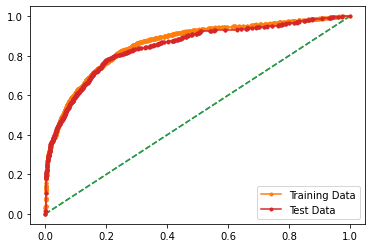

In [170]:
# AUC and ROC for the training data

# calculate AUC
ldtr_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % ldtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
ldrtst_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % ldrtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


**Logistic Regression**

In [171]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression


In [172]:
#Data has already been splitted lets apply the logistic regression model on it

modelg = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
modelg.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [173]:
#Coeffients of the variables 
modelg.coef_

array([[-1.65329988,  0.32523112,  0.17820025, -0.05854467,  0.1534305 ,
        -0.02946958,  0.31217254, -0.42858467,  0.39885664,  0.36829444,
         0.36990571,  0.74281041, -0.10736991,  0.21578887, -0.34703207,
        -0.21368287, -0.09489415]])

In [174]:
churn_data.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [175]:
modelg.intercept_

array([-2.68922849])

In [176]:
ytrain_predict = modelg.predict(X_train)
ytest_predict = modelg.predict(X_test)

In [177]:
metrics.confusion_matrix(Y_train,ytrain_predict)

array([[6205,  201],
       [ 711,  583]], dtype=int64)

In [178]:
metrics.confusion_matrix(Y_test,ytest_predict)

array([[2644,   99],
       [ 288,  270]], dtype=int64)

In [179]:
model_score = modelg.score(X_train, Y_train)
print(model_score)

0.8815584415584415


In [180]:
print('Classification Report of the training data:\n',metrics.classification_report(Y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n',metrics.classification_report(Y_test,ytest_predict),'\n')

Classification Report of the training data:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6406
           1       0.74      0.45      0.56      1294

    accuracy                           0.88      7700
   macro avg       0.82      0.71      0.75      7700
weighted avg       0.87      0.88      0.87      7700
 

Classification Report of the test data:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2743
           1       0.73      0.48      0.58       558

    accuracy                           0.88      3301
   macro avg       0.82      0.72      0.76      3301
weighted avg       0.87      0.88      0.87      3301
 



In [181]:
log_metrics=classification_report(Y_train,ytrain_predict,output_dict=True)
dflog=pd.DataFrame(log_metrics).transpose()
log_train_precision_con=round(dflog.iloc[0][0],2)
log_train_recall_con=round(dflog.iloc[0][1],2)
log_train_f1_con=round(dflog.iloc[0][2],2)
log_train_acc=round(dflog.loc["accuracy"][0],2)
print ('log_train_precision Retain',log_train_precision_con)
print ('log_train_recall Retain',log_train_recall_con)
print ('log_train_f1 Retain',log_train_f1_con)
print ('log_train_accuracy ',log_train_acc)

log_metrics1=classification_report(Y_train,ytrain_predict,output_dict=True)
dflog1=pd.DataFrame(log_metrics1).transpose()
log_train_precision_lab=round(dflog1.iloc[1][0],2)
log_train_recall_lab=round(dflog1.iloc[1][1],2)
log_train_f1_lab=round(dflog1.iloc[1][2],2)
print ('log_train_precision Churn',log_train_precision_lab)
print ('log_train_recall Churn',log_train_recall_lab)
print ('log_train_f1 Churn',log_train_f1_lab)

log_train_precision Retain 0.9
log_train_recall Retain 0.97
log_train_f1 Retain 0.93
log_train_accuracy  0.88
log_train_precision Churn 0.74
log_train_recall Churn 0.45
log_train_f1 Churn 0.56


In [182]:
log_metrics2=classification_report(Y_test,ytest_predict,output_dict=True)
dflog2=pd.DataFrame(log_metrics2).transpose()
log_test_precision_con=round(dflog2.iloc[0][0],2)
log_test_recall_con=round(dflog2.iloc[0][1],2)
log_test_f1_con=round(dflog2.iloc[0][2],2)
log_test_acc=round(dflog2.loc["accuracy"][0],2)
print ('log_test_precision Retain',log_test_precision_con)
print ('log_test_recall Retain',log_test_recall_con)
print ('log_test_f1 Retain',log_test_f1_con)
print ('log_test_accuracy ',log_test_acc)

log_metrics3=classification_report(Y_test,ytest_predict,output_dict=True)
dflog3=pd.DataFrame(log_metrics3).transpose()
log_test_precision_lab=round(dflog3.iloc[1][0],2)
log_test_recall_lab=round(dflog3.iloc[1][1],2)
log_test_f1_lab=round(dflog3.iloc[1][2],2)
print ('log_train_precision Churn',log_test_precision_lab)
print ('log_train_recall Churn',log_test_recall_lab)
print ('log_train_f1 Churn',log_test_f1_lab)

log_test_precision Retain 0.9
log_test_recall Retain 0.96
log_test_f1 Retain 0.93
log_test_accuracy  0.88
log_train_precision Churn 0.73
log_train_recall Churn 0.48
log_train_f1 Churn 0.58


In [183]:
# Training Data Probability Prediction
pred_prob_train = modelg.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = modelg.predict_proba(X_test)

AUC for the Training Data: 0.872
AUC for the Test Data: 0.857


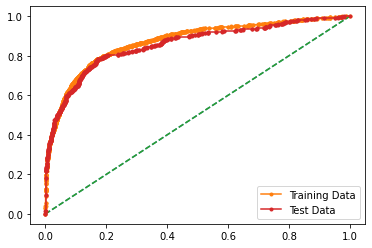

In [184]:
# AUC and ROC for the training data

# calculate AUC
lgtr_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lgtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lgtst_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lgtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


In [185]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': modelg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

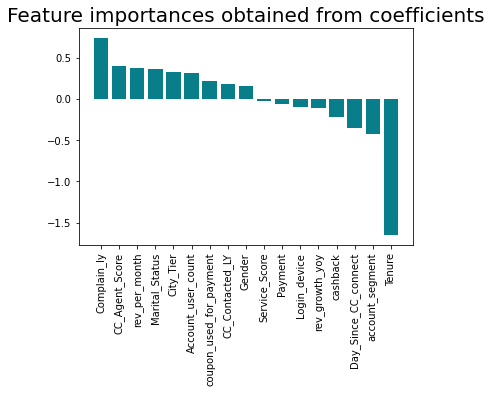

In [186]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

**Applying grid search for logistic REgression**

In [187]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001,0.001]}

In [188]:
modelg1 = LogisticRegression(max_iter=10000,n_jobs=2)

In [189]:
grid_search = GridSearchCV(estimator = modelg1, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [190]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05, 0.001]},
             scoring='f1')

In [191]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)
best_model = grid_search.best_estimator_

{'penalty': 'none', 'solver': 'sag', 'tol': 0.001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag',
                   tol=0.001)


In [192]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [193]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6406
           1       0.74      0.45      0.56      1294

    accuracy                           0.88      7700
   macro avg       0.82      0.71      0.75      7700
weighted avg       0.87      0.88      0.87      7700
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2743
           1       0.73      0.48      0.58       558

    accuracy                           0.88      3301
   macro avg       0.82      0.72      0.76      3301
weighted avg       0.87      0.88      0.87      3301
 



**KNN Model**

In [194]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [195]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [196]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))

## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_test_predict))
print(metrics.classification_report(Y_test, y_test_predict))

0.9763636363636363
[[6363   43]
 [ 139 1155]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6406
           1       0.96      0.89      0.93      1294

    accuracy                           0.98      7700
   macro avg       0.97      0.94      0.96      7700
weighted avg       0.98      0.98      0.98      7700

0.9530445319600122
[[2697   46]
 [ 109  449]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2743
           1       0.91      0.80      0.85       558

    accuracy                           0.95      3301
   macro avg       0.93      0.89      0.91      3301
weighted avg       0.95      0.95      0.95      3301



In [197]:
# Training Data Probability Prediction
pred_prob_train = KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.995
AUC for the Test Data: 0.973


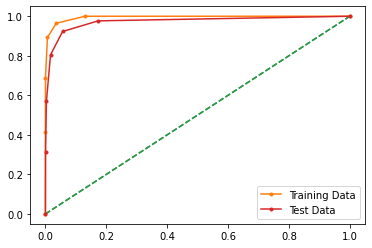

In [198]:
# AUC and ROC for the training data

# calculate AUC
ldtr_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % ldtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1]) #[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
ldrtst_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1]) #[:,1])
print('AUC for the Test Data: %.3f' % ldrtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1]) #[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


**Naïve Bayes Model**

In [199]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [200]:
NB_model = GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [201]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, Y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(Y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(Y_train, y_train_predict))     ## classification_report

## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, Y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(Y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(Y_test, y_test_predict))    ## classification_report

0.8737662337662337
[[5995  411]
 [ 561  733]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6406
           1       0.64      0.57      0.60      1294

    accuracy                           0.87      7700
   macro avg       0.78      0.75      0.76      7700
weighted avg       0.87      0.87      0.87      7700

0.8633747349288095
[[2550  193]
 [ 258  300]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2743
           1       0.61      0.54      0.57       558

    accuracy                           0.86      3301
   macro avg       0.76      0.73      0.74      3301
weighted avg       0.86      0.86      0.86      3301



In [202]:
nb_metrics=classification_report(Y_train,y_train_predict,output_dict=True)
dfnb=pd.DataFrame(nb_metrics).transpose()
nb_train_precision_con=round(dfnb.iloc[0][0],2)
nb_train_recall_con=round(dfnb.iloc[0][1],2)
nb_train_f1_con=round(dfnb.iloc[0][2],2)
nb_train_acc=round(dfnb.loc["accuracy"][0],2)
print ('nb_train_precision churn',nb_train_precision_con)
print ('nb_train_recall churn',nb_train_recall_con)
print ('nb_train_f1 churn',nb_train_f1_con)
print ('nb_train_accuracy ',nb_train_acc)

nb_metrics1=classification_report(Y_train,y_train_predict,output_dict=True)
dfnb1=pd.DataFrame(nb_metrics1).transpose()
nb_train_precision_lab=round(dfnb1.iloc[1][0],2)
nb_train_recall_lab=round(dfnb1.iloc[1][1],2)
nb_train_f1_lab=round(dfnb1.iloc[1][2],2)
print ('nb_train_precision retain',nb_train_precision_lab)
print ('nb_train_recall retain',nb_train_recall_lab)
print ('nb_train_f1 retain',nb_train_f1_lab)

nb_train_precision churn 0.91
nb_train_recall churn 0.94
nb_train_f1 churn 0.93
nb_train_accuracy  0.87
nb_train_precision retain 0.64
nb_train_recall retain 0.57
nb_train_f1 retain 0.6


In [203]:
nb_metrics=classification_report(Y_test,y_test_predict,output_dict=True)
dfnb=pd.DataFrame(nb_metrics).transpose()
nb_test_precision_con=round(dfnb.iloc[0][0],2)
nb_test_recall_con=round(dfnb.iloc[0][1],2)
nb_test_f1_con=round(dfnb.iloc[0][2],2)
nb_test_acc=round(dfnb.loc["accuracy"][0],2)
print ('nb_train_precision churn',nb_test_precision_con)
print ('nb_train_recall churn',nb_test_recall_con)
print ('nb_train_f1 churn',nb_test_f1_con)
print ('nb_train_accuracy ',nb_test_acc)

nb_metrics1=classification_report(Y_test,y_test_predict,output_dict=True)
dfnb1=pd.DataFrame(nb_metrics1).transpose()
nb_test_precision_lab=round(dfnb1.iloc[1][0],2)
nb_test_recall_lab=round(dfnb1.iloc[1][1],2)
nb_test_f1_lab=round(dfnb1.iloc[1][2],2)
print ('nb_train_precision retain',nb_test_precision_lab)
print ('nb_train_recall retain',nb_test_recall_lab)
print ('nb_train_f1 retain',nb_test_f1_lab)

nb_train_precision churn 0.91
nb_train_recall churn 0.93
nb_train_f1 churn 0.92
nb_train_accuracy  0.86
nb_train_precision retain 0.61
nb_train_recall retain 0.54
nb_train_f1 retain 0.57


In [204]:
# Training Data Probability Prediction
pred_prob_train = NB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = NB_model.predict_proba(X_test)

AUC for the Training Data: 0.833
AUC for the Test Data: 0.819


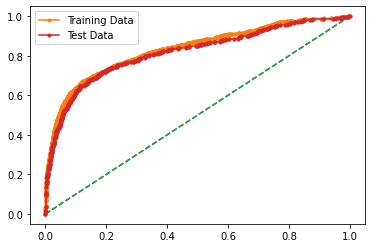

In [205]:
# AUC and ROC for the training data

# calculate AUC
gbtr_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % gbtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
gbtst_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % gbtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


**Bagging**

In [206]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [207]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))


## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_test_predict))
print(metrics.classification_report(Y_test, y_test_predict))

1.0
[[6406    0]
 [   0 1294]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6406
           1       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700

0.966373826113299
[[2708   35]
 [  76  482]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2743
           1       0.93      0.86      0.90       558

    accuracy                           0.97      3301
   macro avg       0.95      0.93      0.94      3301
weighted avg       0.97      0.97      0.97      3301



In [208]:
# Training Data Probability Prediction
pred_prob_train = Bagging_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = Bagging_model.predict_proba(X_test)

In [209]:
# Training Data Probability Prediction
pred_prob_train = Bagging_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = Bagging_model.predict_proba(X_test)

In [210]:
bag_metrics=classification_report(Y_train,y_train_predict,output_dict=True)
dfbag=pd.DataFrame(bag_metrics).transpose()
bag_train_precision_con=round(dfbag.iloc[0][0],2)
bag_train_recall_con=round(dfbag.iloc[0][1],2)
bag_train_f1_con=round(dfbag.iloc[0][2],2)
bag_train_acc=round(dfbag.loc["accuracy"][0],2)
print ('bag_train_precision churn',bag_train_precision_con)
print ('bag_train_recall churn',bag_train_recall_con)
print ('bag_train_f1 churn',bag_train_f1_con)
print ('bag_train_accuracy ',bag_train_acc)

bag_metrics1=classification_report(Y_train,y_train_predict,output_dict=True)
dfbag1=pd.DataFrame(bag_metrics1).transpose()
bag_train_precision_lab=round(dfbag1.iloc[1][0],2)
bag_train_recall_lab=round(dfbag1.iloc[1][1],2)
bag_train_f1_lab=round(dfbag1.iloc[1][2],2)
print ('bag_train_precision retain',bag_train_precision_lab)
print ('bag_train_recall retain',bag_train_recall_lab)
print ('bag_train_f1 retain',bag_train_f1_lab)

bag_train_precision churn 1.0
bag_train_recall churn 1.0
bag_train_f1 churn 1.0
bag_train_accuracy  1.0
bag_train_precision retain 1.0
bag_train_recall retain 1.0
bag_train_f1 retain 1.0


In [211]:
bag_metrics=classification_report(Y_test,y_test_predict,output_dict=True)
dfbag=pd.DataFrame(bag_metrics).transpose()
bag_train_precision_con=round(dfbag.iloc[0][0],2)
bag_train_recall_con=round(dfbag.iloc[0][1],2)
bag_train_f1_con=round(dfbag.iloc[0][2],2)
bag_train_acc=round(dfbag.loc["accuracy"][0],2)
print ('bag_train_precision churn',bag_train_precision_con)
print ('bag_train_recall churn',bag_train_recall_con)
print ('bag_train_f1 churn',bag_train_f1_con)
print ('bag_train_accuracy ',bag_train_acc)

bag_metrics1=classification_report(Y_test,y_test_predict,output_dict=True)
dfbag1=pd.DataFrame(bag_metrics1).transpose()
bag_train_precision_lab=round(dfbag1.iloc[1][0],2)
bag_train_recall_lab=round(dfbag1.iloc[1][1],2)
bag_train_f1_lab=round(dfbag1.iloc[1][2],2)
print ('bag_train_precision retain',bag_train_precision_lab)
print ('bag_train_recall retain',bag_train_recall_lab)
print ('bag_train_f1 retain',bag_train_f1_lab)

bag_train_precision churn 0.97
bag_train_recall churn 0.99
bag_train_f1 churn 0.98
bag_train_accuracy  0.97
bag_train_precision retain 0.93
bag_train_recall retain 0.86
bag_train_f1 retain 0.9


In [212]:
from sklearn.model_selection import GridSearchCV

param_grid = {

    'n_estimators': [101, 301,500],
    'random_state':[1,0,100]
}

bcl = BaggingClassifier(base_estimator=cart) #base_estimator=cart

grid_search = GridSearchCV(estimator = bcl,param_grid = param_grid, cv = 3)



In [213]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'n_estimators': [101, 301, 500],
                         'random_state': [1, 0, 100]})

In [214]:
grid_search.best_params_

{'n_estimators': 500, 'random_state': 0}

In [215]:
best_grid = grid_search.best_estimator_

In [216]:
best_grid

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  random_state=0)

In [217]:
ytrain_predict_best = best_grid.predict(X_train)
ytest_predict_best = best_grid.predict(X_test)

In [218]:
## Performance Matrix on train data set
model_score =best_grid.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, ytrain_predict_best))
print(metrics.classification_report(Y_train, ytrain_predict_best))


## Performance Matrix on test data set

model_score = best_grid.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, ytest_predict_best))
print(metrics.classification_report(Y_test, ytest_predict_best))

1.0
[[6406    0]
 [   0 1294]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6406
           1       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700

0.9672826416237503
[[2707   36]
 [  72  486]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2743
           1       0.93      0.87      0.90       558

    accuracy                           0.97      3301
   macro avg       0.95      0.93      0.94      3301
weighted avg       0.97      0.97      0.97      3301



AUC for the Training Data: 1.000
AUC for the Test Data: 0.986


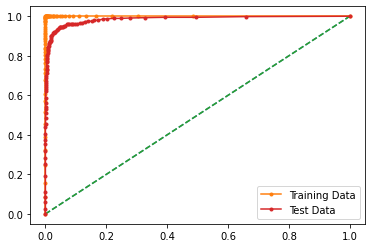

In [219]:
# AUC and ROC for the training data

# calculate AUC
bagtr_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % bagtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
bagtst_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % bagtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Random Forest**

In [220]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [221]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))


## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_test_predict))
print(metrics.classification_report(Y_test, y_test_predict))

1.0
[[6406    0]
 [   0 1294]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6406
           1       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700

0.9645561950923962
[[2716   27]
 [  90  468]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2743
           1       0.95      0.84      0.89       558

    accuracy                           0.96      3301
   macro avg       0.96      0.91      0.93      3301
weighted avg       0.96      0.96      0.96      3301



In [222]:
# Training Data Probability Prediction
pred_prob_train = RF_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = RF_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.991


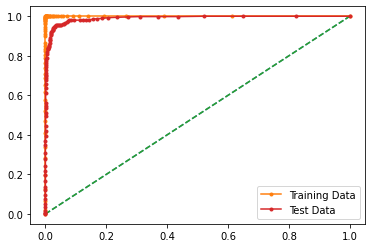

In [223]:
# AUC and ROC for the training data

# calculate AUC
rdtr_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % rdtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
rdtst_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % rdtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


**Boosting**

ADA boosting

In [224]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [225]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))


## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_test_predict))
print(metrics.classification_report(Y_test, y_test_predict))

0.8998701298701298
[[6174  232]
 [ 539  755]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6406
           1       0.76      0.58      0.66      1294

    accuracy                           0.90      7700
   macro avg       0.84      0.77      0.80      7700
weighted avg       0.89      0.90      0.89      7700

0.8954862162980914
[[2627  116]
 [ 229  329]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2743
           1       0.74      0.59      0.66       558

    accuracy                           0.90      3301
   macro avg       0.83      0.77      0.80      3301
weighted avg       0.89      0.90      0.89      3301



In [226]:
# Training Data Probability Prediction
pred_prob_train = ADB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = ADB_model.predict_proba(X_test)

AUC for the Training Data: 0.923
AUC for the Test Data: 0.911


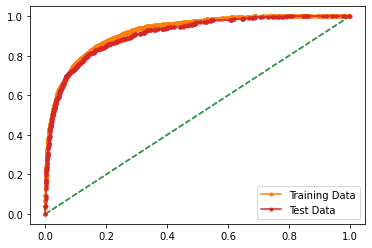

In [227]:
# AUC and ROC for the training data

# calculate AUC
ldtr_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % ldtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
ldrtst_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % ldrtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [228]:
param_grid = {
    'learning_rate': [1, 0.1,0.01],
    'n_estimators': [50,101, 301]

}

adbos = AdaBoostClassifier()

grid_search = GridSearchCV(estimator = adbos, param_grid = param_grid, cv = 3)



In [229]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1, 0.1, 0.01],
                         'n_estimators': [50, 101, 301]})

In [230]:
grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 101}

In [231]:
best_grid = grid_search.best_estimator_

In [232]:
best_grid

AdaBoostClassifier(learning_rate=1, n_estimators=101)

In [233]:
ytrain_predict_best = best_grid.predict(X_train)
ytest_predict_best = best_grid.predict(X_test)

In [234]:
## Performance Matrix on train data set
model_score =best_grid.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, ytrain_predict_best))
print(metrics.classification_report(Y_train, ytrain_predict_best))


## Performance Matrix on test data set

model_score = best_grid.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, ytest_predict_best))
print(metrics.classification_report(Y_test, ytest_predict_best))

0.9003896103896104
[[6164  242]
 [ 525  769]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6406
           1       0.76      0.59      0.67      1294

    accuracy                           0.90      7700
   macro avg       0.84      0.78      0.80      7700
weighted avg       0.89      0.90      0.90      7700

0.8963950318085429
[[2622  121]
 [ 221  337]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2743
           1       0.74      0.60      0.66       558

    accuracy                           0.90      3301
   macro avg       0.83      0.78      0.80      3301
weighted avg       0.89      0.90      0.89      3301



In [235]:
# Training Data Probability Prediction
pred_prob_train = best_grid.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_grid.predict_proba(X_test)

AUC for the Training Data: 0.923
AUC for the Test Data: 0.911


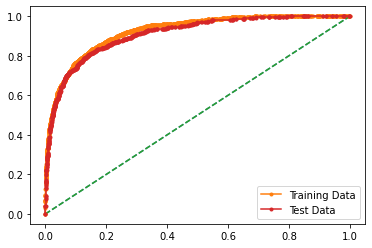

In [236]:
# AUC and ROC for the training data

# calculate AUC
adtr_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % adtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
adtst_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % adtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


In [237]:
adbos_metrics=classification_report(Y_train,ytrain_predict_best,output_dict=True)
dfad=pd.DataFrame(adbos_metrics).transpose()
ad_train_precision_con=round(dfad.iloc[0][0],2)
ad_train_recall_con=round(dfad.iloc[0][1],2)
ad_train_f1_con=round(dfad.iloc[0][2],2)
ad_train_acc=round(dfad.loc["accuracy"][0],2)
print ('ad_train_precision churn',ad_train_precision_con)
print ('ad_train_recall churn',ad_train_recall_con)
print ('ad_train_f1 churn',ad_train_f1_con)
print ('ad_train_accuracy ',ad_train_acc)

ad_metrics1=classification_report(Y_train,ytrain_predict_best,output_dict=True)
dfad1=pd.DataFrame(ad_metrics1).transpose()
ad_train_precision_lab=round(dfad1.iloc[1][0],2)
ad_train_recall_lab=round(dfad1.iloc[1][1],2)
ad_train_f1_lab=round(dfad1.iloc[1][2],2)
print ('ad_train_precision retain',ad_train_precision_lab)
print ('ad_train_recall retain',ad_train_recall_lab)
print ('ad_train_f1 retain',ad_train_f1_lab)

ad_train_precision churn 0.92
ad_train_recall churn 0.96
ad_train_f1 churn 0.94
ad_train_accuracy  0.9
ad_train_precision retain 0.76
ad_train_recall retain 0.59
ad_train_f1 retain 0.67


In [238]:
adbos_metrics=classification_report(Y_test,ytest_predict_best,output_dict=True)
dfad=pd.DataFrame(adbos_metrics).transpose()
ad_train_precision_con=round(dfad.iloc[0][0],2)
ad_train_recall_con=round(dfad.iloc[0][1],2)
ad_train_f1_con=round(dfad.iloc[0][2],2)
ad_train_acc=round(dfad.loc["accuracy"][0],2)
print ('ad_train_precision churn',ad_train_precision_con)
print ('ad_train_recall churn',ad_train_recall_con)
print ('ad_train_f1 churn',ad_train_f1_con)
print ('ad_train_accuracy ',ad_train_acc)

ad_metrics1=classification_report(Y_test,ytest_predict_best,output_dict=True)
dfad1=pd.DataFrame(ad_metrics1).transpose()
ad_train_precision_lab=round(dfad1.iloc[1][0],2)
ad_train_recall_lab=round(dfad1.iloc[1][1],2)
ad_train_f1_lab=round(dfad1.iloc[1][2],2)
print ('ad_train_precision retain',ad_train_precision_lab)
print ('ad_train_recall retain',ad_train_recall_lab)
print ('ad_train_f1 retain',ad_train_f1_lab)

ad_train_precision churn 0.92
ad_train_recall churn 0.96
ad_train_f1 churn 0.94
ad_train_accuracy  0.9
ad_train_precision retain 0.74
ad_train_recall retain 0.6
ad_train_f1 retain 0.66


**Gradient Boosting**

In [239]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, Y_train)

In [240]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))



## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_test_predict))
print(metrics.classification_report(Y_test, y_test_predict))

0.9192207792207793
[[6256  150]
 [ 472  822]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6406
           1       0.85      0.64      0.73      1294

    accuracy                           0.92      7700
   macro avg       0.89      0.81      0.84      7700
weighted avg       0.92      0.92      0.91      7700

0.9066949409269918
[[2663   80]
 [ 228  330]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2743
           1       0.80      0.59      0.68       558

    accuracy                           0.91      3301
   macro avg       0.86      0.78      0.81      3301
weighted avg       0.90      0.91      0.90      3301



In [241]:
# Training Data Probability Prediction
pred_prob_train = gbcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = gbcl.predict_proba(X_test)

AUC for the Training Data: 0.950
AUC for the Test Data: 0.933


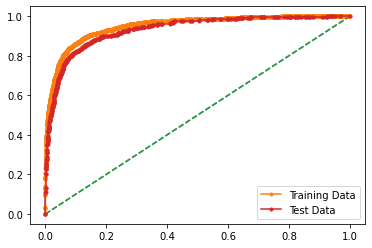

In [242]:
# AUC and ROC for the training data

# calculate AUC
gdtr_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % gdtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
gdtst_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % gdtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [243]:
grbos_metrics=classification_report(Y_train,ytrain_predict_best,output_dict=True)
dfgr=pd.DataFrame(grbos_metrics).transpose()
gr_train_precision_con=round(dfgr.iloc[0][0],2)
gr_train_recall_con=round(dfgr.iloc[0][1],2)
gr_train_f1_con=round(dfgr.iloc[0][2],2)
gr_train_acc=round(dfgr.loc["accuracy"][0],2)
print ('gr_train_precision churn',gr_train_precision_con)
print ('gr_train_recall churn',gr_train_recall_con)
print ('gr_train_f1 churn',gr_train_f1_con)
print ('gr_train_accuracy ',gr_train_acc)

gr_metrics1=classification_report(Y_train,ytrain_predict_best,output_dict=True)
dfgr1=pd.DataFrame(gr_metrics1).transpose()
gr_train_precision_lab=round(dfgr1.iloc[1][0],2)
gr_train_recall_lab=round(dfgr1.iloc[1][1],2)
gr_train_f1_lab=round(dfgr1.iloc[1][2],2)
print ('gr_train_precision retain',gr_train_precision_lab)
print ('gr_train_recall retain',gr_train_recall_lab)
print ('gr_train_f1 retain',gr_train_f1_lab)

gr_train_precision churn 0.92
gr_train_recall churn 0.96
gr_train_f1 churn 0.94
gr_train_accuracy  0.9
gr_train_precision retain 0.76
gr_train_recall retain 0.59
gr_train_f1 retain 0.67


In [244]:
grbos_metrics=classification_report(Y_test,ytest_predict_best,output_dict=True)
dfgr=pd.DataFrame(grbos_metrics).transpose()
gr_train_precision_con=round(dfgr.iloc[0][0],2)
gr_train_recall_con=round(dfgr.iloc[0][1],2)
gr_train_f1_con=round(dfgr.iloc[0][2],2)
gr_train_acc=round(dfgr.loc["accuracy"][0],2)
print ('gr_train_precision churn',gr_train_precision_con)
print ('gr_train_recall churn',gr_train_recall_con)
print ('gr_train_f1 churn',gr_train_f1_con)
print ('gr_train_accuracy ',gr_train_acc)

gr_metrics1=classification_report(Y_test,ytest_predict_best,output_dict=True)
dfgr1=pd.DataFrame(gr_metrics1).transpose()
gr_train_precision_lab=round(dfgr1.iloc[1][0],2)
gr_train_recall_lab=round(dfgr1.iloc[1][1],2)
gr_train_f1_lab=round(dfgr1.iloc[1][2],2)
print ('gr_train_precision retain',gr_train_precision_lab)
print ('gr_train_recall retain',gr_train_recall_lab)
print ('gr_train_f1 retain',gr_train_f1_lab)

gr_train_precision churn 0.92
gr_train_recall churn 0.96
gr_train_f1 churn 0.94
gr_train_accuracy  0.9
gr_train_precision retain 0.74
gr_train_recall retain 0.6
gr_train_f1 retain 0.66


Model tuning

In [245]:
param_grid = {
#     'learning_rate': [1, 0.1],
    'n_estimators': [50,101],
    'tol': [0.01,0.0001],
     'max_depth': [3,7,20],   
    'min_samples_leaf': [1,5,20],
    'min_samples_split': [2,3,60],   
 
}

gbos = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator = gbos, param_grid = param_grid, cv = 3)



In [246]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 7, 20],
                         'min_samples_leaf': [1, 5, 20],
                         'min_samples_split': [2, 3, 60],
                         'n_estimators': [50, 101], 'tol': [0.01, 0.0001]})

In [247]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 101,
 'tol': 0.01}

In [248]:
best_grid = grid_search.best_estimator_

In [249]:
best_grid

GradientBoostingClassifier(max_depth=20, min_samples_leaf=5,
                           min_samples_split=3, n_estimators=101, tol=0.01)

In [250]:
ytrain_predict_best = best_grid.predict(X_train)
ytest_predict_best = best_grid.predict(X_test)

In [251]:
## Performance Matrix on train data set
model_score =best_grid.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, ytrain_predict_best))
print(metrics.classification_report(Y_train, ytrain_predict_best))


## Performance Matrix on test data set

model_score = best_grid.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, ytest_predict_best))
print(metrics.classification_report(Y_test, ytest_predict_best))

1.0
[[6406    0]
 [   0 1294]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6406
           1       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700

0.9760678582247804
[[2718   25]
 [  54  504]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2743
           1       0.95      0.90      0.93       558

    accuracy                           0.98      3301
   macro avg       0.97      0.95      0.96      3301
weighted avg       0.98      0.98      0.98      3301



**Oversampling using Smote**

In [253]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [255]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [257]:
counter=Counter(Y)
counter


Counter({1: 9149, 0: 9149})

In [259]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,-0.704189,1.479979,-1.380526,0.236140,-1.214159,0.135956,-0.515055,0.700766,-0.770012,1.273428,1.295405,1.61752,-1.384988,-0.436018,0.126480,-0.404288,0.293908
1,-1.153115,-0.709243,-1.147274,2.226773,0.760555,0.135956,0.366969,-0.166988,-0.041708,1.273428,0.601043,1.61752,-0.321004,-1.341042,-1.305301,-1.292502,0.293908
2,-1.153115,-0.709243,1.418500,0.236140,0.760555,-1.247623,0.366969,-0.166988,-0.041708,1.273428,0.253861,1.61752,-0.587000,-1.341042,-0.446232,-0.274572,0.293908
3,-1.153115,1.479979,-0.330891,0.236140,0.760555,-1.247623,0.366969,0.700766,1.414899,1.273428,0.948224,-0.61823,1.806965,-1.341042,-0.446232,-0.992790,0.293908
4,-1.153115,-0.709243,-0.680769,-0.759177,0.760555,-1.247623,-0.515055,-0.166988,1.414899,1.273428,-0.787683,-0.61823,-1.384988,-0.436018,-0.446232,-1.094515,0.293908


In [260]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [264]:
Y.value_counts()

1    9149
0    9149
Name: Churn, dtype: int64

In [261]:
# Split X and y into training and test set in 70:30 ratio
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

**KNN after using SMote**

In [262]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X1_train,Y1_train)

KNeighborsClassifier()

In [263]:
## Performance Matrix on train data set
y1_train_predict = KNN_model.predict(X1_train)
model_score = KNN_model.score(X1_train, Y1_train)
print(model_score)
print(metrics.confusion_matrix(Y1_train, y1_train_predict))
print(metrics.classification_report(Y1_train, y1_train_predict))

## Performance Matrix on test data set
y1_test_predict = KNN_model.predict(X1_test)
model_score = KNN_model.score(X1_test, Y1_test)
print(model_score)
print(metrics.confusion_matrix(Y1_test, y1_test_predict))
print(metrics.classification_report(Y1_test, y1_test_predict))

0.9731417863835103
[[6043  335]
 [   9 6421]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6378
           1       0.95      1.00      0.97      6430

    accuracy                           0.97     12808
   macro avg       0.97      0.97      0.97     12808
weighted avg       0.97      0.97      0.97     12808

0.9557377049180328
[[2541  230]
 [  13 2706]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2771
           1       0.92      1.00      0.96      2719

    accuracy                           0.96      5490
   macro avg       0.96      0.96      0.96      5490
weighted avg       0.96      0.96      0.96      5490



In [286]:
# Training Data Probability Prediction
pred_prob_train = KNN_model.predict_proba(X1_train)

# Test Data Probability Prediction
pred_prob_test = KNN_model.predict_proba(X1_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.995


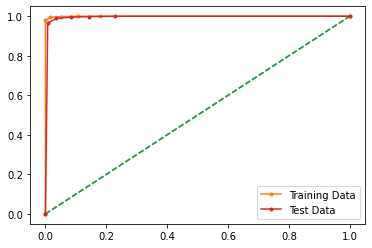

In [287]:
# AUC and ROC for the training data

# calculate AUC
ldtr_auc = metrics.roc_auc_score(Y1_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % ldtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_train,pred_prob_train[:,1]) #[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
ldrtst_auc = metrics.roc_auc_score(Y1_test,pred_prob_test[:,1]) #[:,1])
print('AUC for the Test Data: %.3f' % ldrtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_test,pred_prob_test[:,1]) #[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


**LDA after smote**

In [266]:
#Build LDA Model
clf1 = LinearDiscriminantAnalysis() 
modelld=clf1.fit(X1_train,Y1_train)

In [267]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = modelld.predict(X1_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = modelld.predict(X1_test)

In [268]:
metrics.confusion_matrix(Y1_train,pred_class_train)

array([[4790, 1588],
       [1087, 5343]], dtype=int64)

In [269]:
metrics.confusion_matrix(Y1_test,pred_class_test)

array([[2073,  698],
       [ 461, 2258]], dtype=int64)

In [270]:
model_score = clf1.score(X1_train, Y1_train)
print(model_score)

0.7911461586508433


In [271]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y1_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y1_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.82      0.75      0.78      6378
           1       0.77      0.83      0.80      6430

    accuracy                           0.79     12808
   macro avg       0.79      0.79      0.79     12808
weighted avg       0.79      0.79      0.79     12808
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.82      0.75      0.78      2771
           1       0.76      0.83      0.80      2719

    accuracy                           0.79      5490
   macro avg       0.79      0.79      0.79      5490
weighted avg       0.79      0.79      0.79      5490
 



In [288]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = modelld.predict(X1_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = modelld.predict(X1_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.995


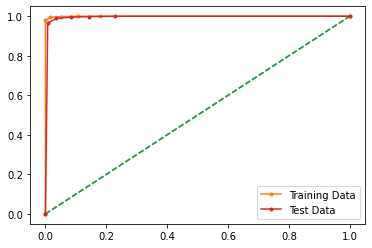

In [289]:
# AUC and ROC for the training data

# calculate AUC
ldtr_auc = metrics.roc_auc_score(Y1_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % ldtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
ldrtst_auc = metrics.roc_auc_score(Y1_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % ldrtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Logistic regression after Smote**

In [272]:
#Data has already been splitted lets apply the logistic regression model on it

modelg = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
modelg.fit(X1_train, Y1_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   10.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [273]:
ytrain_predict = modelg.predict(X1_train)
ytest_predict = modelg.predict(X1_test)

In [274]:
metrics.confusion_matrix(Y1_train,ytrain_predict)

array([[4936, 1442],
       [1169, 5261]], dtype=int64)

In [275]:
metrics.confusion_matrix(Y1_test,ytest_predict)

array([[2142,  629],
       [ 493, 2226]], dtype=int64)

In [276]:
print('Classification Report of the training data:\n',metrics.classification_report(Y1_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n',metrics.classification_report(Y1_test,ytest_predict),'\n')

Classification Report of the training data:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      6378
           1       0.78      0.82      0.80      6430

    accuracy                           0.80     12808
   macro avg       0.80      0.80      0.80     12808
weighted avg       0.80      0.80      0.80     12808
 

Classification Report of the test data:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      2771
           1       0.78      0.82      0.80      2719

    accuracy                           0.80      5490
   macro avg       0.80      0.80      0.80      5490
weighted avg       0.80      0.80      0.80      5490
 



In [290]:
# Training Data Probability Prediction
pred_prob_train = modelg.predict_proba(X1_train)

# Test Data Probability Prediction
pred_prob_test = modelg.predict_proba(X1_test)

AUC for the Training Data: 0.872
AUC for the Test Data: 0.873


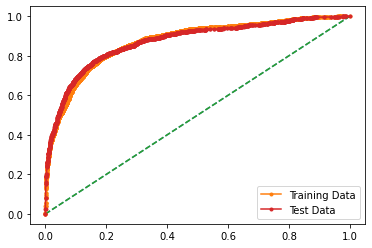

In [291]:
# AUC and ROC for the training data

# calculate AUC
lgtr_auc = metrics.roc_auc_score(Y1_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lgtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lgtst_auc = metrics.roc_auc_score(Y1_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lgtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Naive Bayes after smote**

In [277]:
NB_model1 = GaussianNB()
NB_model1.fit(X1_train, Y1_train)

GaussianNB()

In [300]:
y_train_predict = NB_model1.predict(X1_train)
model_score = NB_model1.score(X1_train, Y1_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(Y1_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(Y1_train, y_train_predict))     ## classification_report

## Performance Matrix on test data set
y_test_predict = NB_model1.predict(X1_test)
model_score = NB_model1.score(X1_test, Y1_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(Y1_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(Y1_test, y_test_predict))    ## classification_report

0.7421143035602749
[[4278 2100]
 [1203 5227]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72      6378
           1       0.71      0.81      0.76      6430

    accuracy                           0.74     12808
   macro avg       0.75      0.74      0.74     12808
weighted avg       0.75      0.74      0.74     12808

0.7364298724954462
[[1827  944]
 [ 503 2216]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72      2771
           1       0.70      0.82      0.75      2719

    accuracy                           0.74      5490
   macro avg       0.74      0.74      0.74      5490
weighted avg       0.74      0.74      0.73      5490



In [292]:
# Training Data Probability Prediction
pred_prob_train = NB_model1.predict_proba(X1_train)

# Test Data Probability Prediction
pred_prob_test = NB_model1.predict_proba(X1_test)

AUC for the Training Data: 0.834
AUC for the Test Data: 0.831


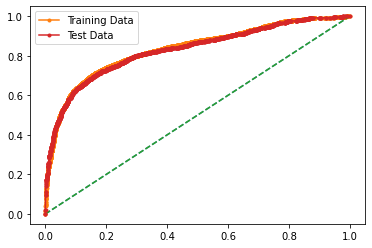

In [293]:
# AUC and ROC for the training data

# calculate AUC
gbtr_auc = metrics.roc_auc_score(Y1_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % gbtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
gbtst_auc = metrics.roc_auc_score(Y1_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % gbtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


**Random Forest after smote**

In [279]:
from sklearn.ensemble import RandomForestClassifier

RF_model1=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model1.fit(X1_train, Y1_train)

RandomForestClassifier(random_state=1)

In [280]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X1_train)
model_score =RF_model.score(X1_train, Y1_train)
print(model_score)
print(metrics.confusion_matrix(Y1_train, y_train_predict))
print(metrics.classification_report(Y1_train, y_train_predict))


## Performance Matrix on test data set
y_test_predict = RF_model.predict(X1_test)
model_score = RF_model.score(X1_test, Y1_test)
print(model_score)
print(metrics.confusion_matrix(Y1_test, y_test_predict))
print(metrics.classification_report(Y1_test, y_test_predict))

0.9580730793254216
[[6363   15]
 [ 522 5908]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6378
           1       1.00      0.92      0.96      6430

    accuracy                           0.96     12808
   macro avg       0.96      0.96      0.96     12808
weighted avg       0.96      0.96      0.96     12808

0.9537340619307833
[[2759   12]
 [ 242 2477]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2771
           1       1.00      0.91      0.95      2719

    accuracy                           0.95      5490
   macro avg       0.96      0.95      0.95      5490
weighted avg       0.96      0.95      0.95      5490



In [294]:
# Training Data Probability Prediction
pred_prob_train = RF_model.predict_proba(X1_train)

# Test Data Probability Prediction
pred_prob_test = RF_model.predict_proba(X1_test)

AUC for the Training Data: 0.999
AUC for the Test Data: 0.997


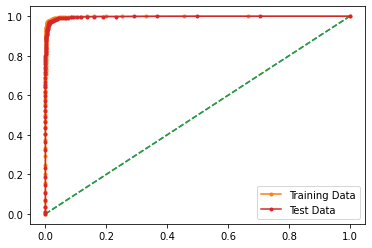

In [295]:
# AUC and ROC for the training data

# calculate AUC
rdtr_auc = metrics.roc_auc_score(Y1_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % rdtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
rdtst_auc = metrics.roc_auc_score(Y1_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % rdtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Bagging after SMOTE**

In [281]:
Bagging_model1=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model1.fit(X1_train, Y1_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [283]:
## Performance Matrix on train data set
y_train_predict = Bagging_model1.predict(X1_train)
model_score =Bagging_model.score(X1_train, Y1_train)
print(model_score)
print(metrics.confusion_matrix(Y1_train, y_train_predict))
print(metrics.classification_report(Y1_train, y_train_predict))


## Performance Matrix on test data set
y_test_predict = Bagging_model1.predict(X1_test)
model_score = Bagging_model1.score(X1_test, Y1_test)
print(model_score)
print(metrics.confusion_matrix(Y1_test, y_test_predict))
print(metrics.classification_report(Y1_test, y_test_predict))

0.9588538413491567
[[6378    0]
 [   0 6430]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6378
           1       1.00      1.00      1.00      6430

    accuracy                           1.00     12808
   macro avg       1.00      1.00      1.00     12808
weighted avg       1.00      1.00      1.00     12808

0.9730418943533697
[[2681   90]
 [  58 2661]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2771
           1       0.97      0.98      0.97      2719

    accuracy                           0.97      5490
   macro avg       0.97      0.97      0.97      5490
weighted avg       0.97      0.97      0.97      5490



In [296]:
# Training Data Probability Prediction
pred_prob_train = Bagging_model1.predict_proba(X1_train)

# Test Data Probability Prediction
pred_prob_test = Bagging_model1.predict_proba(X1_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.997


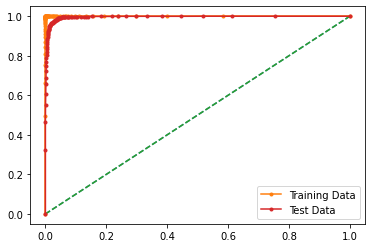

In [297]:
# AUC and ROC for the training data

# calculate AUC
bagtr_auc = metrics.roc_auc_score(Y1_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % bagtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
bagtst_auc = metrics.roc_auc_score(Y1_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % bagtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Boosting after SMOTE**

In [284]:
ADB_model1 = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model1.fit(X1_train,Y1_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [285]:
## Performance Matrix on train data set
y_train_predict = ADB_model1.predict(X1_train)
model_score = ADB_model1.score(X1_train, Y1_train)
print(model_score)
print(metrics.confusion_matrix(Y1_train, y_train_predict))
print(metrics.classification_report(Y1_train, y_train_predict))


## Performance Matrix on test data set
y_test_predict = ADB_model1.predict(X1_test)
model_score = ADB_model1.score(X1_test, Y1_test)
print(model_score)
print(metrics.confusion_matrix(Y1_test, y_test_predict))
print(metrics.classification_report(Y1_test, y_test_predict))

0.8959244222361025
[[5738  640]
 [ 693 5737]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      6378
           1       0.90      0.89      0.90      6430

    accuracy                           0.90     12808
   macro avg       0.90      0.90      0.90     12808
weighted avg       0.90      0.90      0.90     12808

0.8961748633879781
[[2514  257]
 [ 313 2406]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2771
           1       0.90      0.88      0.89      2719

    accuracy                           0.90      5490
   macro avg       0.90      0.90      0.90      5490
weighted avg       0.90      0.90      0.90      5490



In [298]:
# Training Data Probability Prediction
pred_prob_train = ADB_model1.predict_proba(X1_train)

# Test Data Probability Prediction
pred_prob_test = ADB_model1.predict_proba(X1_test)

AUC for the Training Data: 0.964
AUC for the Test Data: 0.960


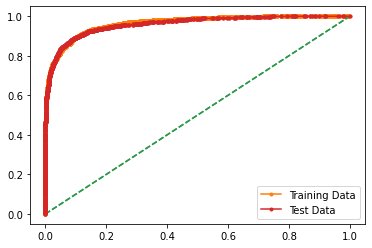

In [299]:
# AUC and ROC for the training data

# calculate AUC
ldtr_auc = metrics.roc_auc_score(Y1_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % ldtr_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
ldrtst_auc = metrics.roc_auc_score(Y1_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % ldrtst_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()